### Context: 

An incident is something that is unplanned interruption to an IT service or reduction in the quality of an IT service that affects the Users and the Business. In most of the organizations, incidents are created by various Business and IT Users, End Users/ Vendors if they have access to ticketing systems, and from the integrated monitoring systems and tools. Assigning the incidents to the appropriate person or unit in the support team has critical importance to provide improved user satisfaction while ensuring better allocation of support resources.

### Objective:

In this capstone project, the goal is to build a classifier that can classify the tickets by analyzing text

##### Import necessary libraries

Please uncomment the below comments and run it to install wordcloud, nlpaug, textblob.

In [1]:
#!pip install wordcloud

#!pip install nlpaug

#!pip install textblob

Install additional libraries[eg: Run !pip install wordcloud in the code cell]. If you get error even after you have installed additional libraries that did not come with anaconda, please restart the kernel or re-run the below cell.

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.simplefilter('ignore')
import numpy as np
import copy
import re
import string
import nltk
nltk.download('wordnet', quiet=True)
nltk.download('stopwords', quiet=True)
from nltk.corpus import stopwords
nltk.download('words', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)
from nltk import WordNetLemmatizer
from wordcloud import WordCloud
from keras.preprocessing.text import Tokenizer
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional, BatchNormalization, Dropout, GRU
from keras.layers.embeddings import Embedding
from keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
import random as python_random
import nlpaug.augmenter.word as naw
from sklearn.utils import resample
import math
from sklearn.decomposition import LatentDirichletAllocation
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

##### Import dataset and explore

In [4]:
# Read the csv file as a data frame
df = pd.read_csv("input_data.csv")

In [5]:
#check shape of data
df.shape

(8500, 4)

The dataset has 8500 rows/observations and 4 columns/attributes

In [6]:
#View first 5 rows of data
df.head(5)

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\n\nreceived from: hmjdrvpb.komuaywn@gmail.com...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [7]:
#View last 5 rows of data
df.tail(5) 

,Short description,Description,Caller,Assignment group
8495,emails not coming in from zz mail,\n\nreceived from: avglmrts.vhqmtiua@gmail.com...,avglmrts vhqmtiua,GRP_29
8496,telephony_software issue,telephony_software issue,rbozivdq gmlhrtvp,GRP_0
8497,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0
8498,machine nÃ£o estÃ¡ funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,GRP_62
8499,an mehreren pc`s lassen sich verschiedene prgr...,an mehreren pc`s lassen sich verschiedene prgr...,kqvbrspl jyzoklfx,GRP_49


In [8]:
#Get information about the data along with the data type of each attribute
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
Short description    8498 non-null object
Description          8499 non-null object
Caller               8500 non-null object
Assignment group     8500 non-null object
dtypes: object(4)
memory usage: 265.7+ KB


The count of data types (object(4)) and memory usage are provided

##### Understanding the structure of data

In [9]:
#Unique values of Assignment group attribute
df['Assignment group'].unique()

array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'GRP_35', 'GRP_36', 'GRP_37', 'GRP_38',
       'GRP_39', 'GRP_40', 'GRP_41', 'GRP_42', 'GRP_43', 'GRP_44',
       'GRP_45', 'GRP_46', 'GRP_47', 'GRP_48', 'GRP_49', 'GRP_50',
       'GRP_51', 'GRP_52', 'GRP_53', 'GRP_54', 'GRP_55', 'GRP_56',
       'GRP_57', 'GRP_58', 'GRP_59', 'GRP_60', 'GRP_61', 'GRP_32',
       'GRP_62', 'GRP_63', 'GRP_64', 'GRP_65', 'GRP_66', 'GRP_67',
       'GRP_68', 'GRP_69', 'GRP_70', 'GRP_71', 'GRP_72', 'GRP_73'],
      dtype=object)

In [10]:
#Percentage form value counts of Assignment group
df["Assignment group"].value_counts(normalize=True)

GRP_0     0.467765
GRP_8     0.077765
GRP_24    0.034000
GRP_12    0.030235
GRP_9     0.029647
GRP_2     0.028353
GRP_19    0.025294
GRP_3     0.023529
GRP_6     0.021647
GRP_13    0.017059
GRP_10    0.016471
GRP_5     0.015176
GRP_14    0.013882
GRP_25    0.013647
GRP_33    0.012588
GRP_4     0.011765
GRP_29    0.011412
GRP_18    0.010353
GRP_16    0.010000
GRP_17    0.009529
GRP_31    0.008118
GRP_7     0.008000
GRP_34    0.007294
GRP_26    0.006588
GRP_40    0.005294
GRP_28    0.005176
GRP_41    0.004706
GRP_15    0.004588
GRP_30    0.004588
GRP_42    0.004353
            ...   
GRP_36    0.001765
GRP_44    0.001765
GRP_50    0.001647
GRP_65    0.001294
GRP_53    0.001294
GRP_52    0.001059
GRP_55    0.000941
GRP_51    0.000941
GRP_49    0.000706
GRP_59    0.000706
GRP_46    0.000706
GRP_43    0.000588
GRP_66    0.000471
GRP_32    0.000471
GRP_38    0.000353
GRP_68    0.000353
GRP_56    0.000353
GRP_63    0.000353
GRP_58    0.000353
GRP_57    0.000235
GRP_69    0.000235
GRP_71    0.

In [11]:
#Converting Description attribute to str type
df['Description'] = df['Description'].astype(str)

In [12]:
#Create a word count attribute for Description
df['Description_word_count'] = df['Description'].apply(lambda text: len(text.split()))

In [13]:
#Maximum word count of a Description
df['Description_word_count'].max()

1625

In [14]:
#Mean word count of a Description
df['Description_word_count'].mean()

27.27423529411765

##### Data Cleaning [Missing points, Duplicates, Inconsistencies]

In [15]:
#Removing Caller column which is not relevant to determine the Assignment group
df.drop(['Caller'],axis=1, inplace=True)

In [16]:
#Get indexes of missing/nan value in Description attribute
idx_list = df[df['Description'].isnull()].index.tolist()

In [17]:
#Copy value from Short Description attribute to Description attribute for missing values.
for idx in idx_list:
    df.at[idx, 'Description'] = df.at[idx, 'Short description']

In [18]:
#There are Inconsistencies in Description attribute such as holding only one word[eg:"complete"] and having no
#information about the problem[eg: "please see attachment"] and also less information than Short description attribute
#Copying Short description to Description to avoid inconsistencies and have more information.
for idx, row in copy.deepcopy(df).iterrows():
    if(pd.notnull(row['Short description'])):
        if(row['Description_word_count'] < len(row['Short description'].split())):
            df.at[idx, 'Description'] = df.at[idx, 'Short description']

In [19]:
#Check for duplicate data that has same Description and Assignment group
df.duplicated(subset=['Description','Assignment group']).sum()

623

In [20]:
#Remove duplicate data that has same Description and Assignment group
df.drop_duplicates(['Description','Assignment group'], inplace=True)
df.shape

(7877, 4)

##### Visualizing different patterns

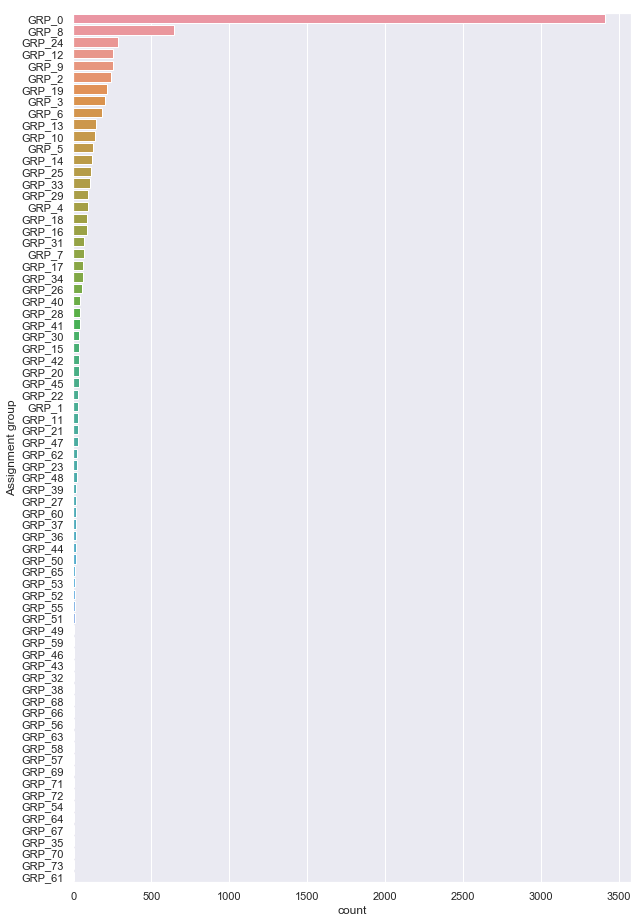

In [21]:
#Plot Assignment group values in increasing order
plt.figure(figsize = (10, 16))
sns.countplot(y= df['Assignment group'] ,data=df, order = df['Assignment group'].value_counts().index);

Majority of the Description/tickets belongs to Assignment groups GRP_0,GRP_8,GRP_24,GRP_12,GRP_9,GRP_2,GRP_19,GRP_3,GRP_6,GRP_13,GRP_10,GRP_5,GRP_14,GRP_25,GRP_33,GRP_29,GRP_4,
GRP_18,GRP_16,GRP_31,GRP_7,GRP_34, and GRP_26. And, as we observe in the above plot, some reasonable number of Description/tickets belong to GRP_40 until GRP_52. There is bias in classes with close to 50% of the data belonging to GRP_0 class.

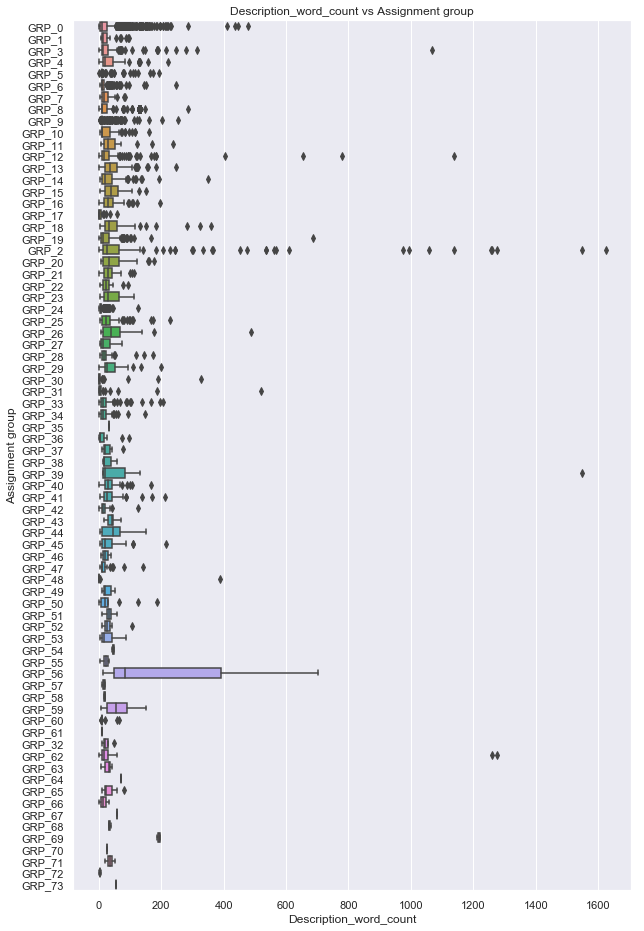

In [22]:
#Plot Description word count against Assignment groups
plt.figure(figsize = (10, 16))
sns.boxplot(x = 'Description_word_count', y = 'Assignment group', data = df)
plt.xlabel("Description_word_count")
plt.ylabel("Assignment group")
plt.title("Description_word_count vs Assignment group")
plt.show()

Almost every Assignment group has outliers at various length of Description word count. The average word count for every Assignment group seems to be almost under 30 words and covers most of the words for each class. This average word count will be helpful to decide the max length to be considered while converting text to sequence of numbers(vectors). And, during computation it will occupy less memory and training time will be lesser.

##### Text Preprocessing

In [23]:
#Keep only required columns[Description and Assignment group] for further processing. Make two copies of dataframe.
#df_base_txt_acc to use it for building a model with base text(only remove punctuations/stopwords).
#df_process_txt_acc to use it for building a model with complete preprocessed text(remove punctuations, stopwords, 
#spaces, special symbols, lemmatize etc). Remove no longer required variables to free up memory.
df.drop(['Short description', 'Description_word_count'],axis=1, inplace=True)
df_base_txt_acc = copy.deepcopy(df)
df_process_txt_acc = copy.deepcopy(df)
del df
df_base_txt_acc.shape, df_process_txt_acc.shape

((7877, 2), (7877, 2))

In [24]:
#Convert text to lowercase
def text_to_lower(txt):
    return txt.lower()

In [25]:
#Apply text_to_lower to remove any weight/value difference that could occur between lowercase and uppercase
df_process_txt_acc["Description"] = df_process_txt_acc["Description"].apply(text_to_lower)
df_process_txt_acc.head()

,Description,Assignment group
0,-verified user details.(employee# & manager na...,GRP_0
1,\n\nreceived from: hmjdrvpb.komuaywn@gmail.com...,GRP_0
2,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com...,GRP_0
3,unable to access hr_tool page,GRP_0
4,skype error,GRP_0


In [26]:
#Remove characters
def remove_chars(txt, chars):
    return txt.replace(chars,'')

In [27]:
#Remove newline character and "received from" string as these two information in the text does not add value to the 
#problem description
df_process_txt_acc["Description"] = df_process_txt_acc["Description"].apply(lambda text: remove_chars(text, '\n'))
df_process_txt_acc["Description"] = df_process_txt_acc["Description"].apply(lambda text: remove_chars(text, 'received from'))
df_process_txt_acc.head()

,Description,Assignment group
0,-verified user details.(employee# & manager na...,GRP_0
1,": hmjdrvpb.komuaywn@gmail.comhello team,my mee...",GRP_0
2,: eylqgodm.ybqkwiam@gmail.comhii cannot log on...,GRP_0
3,unable to access hr_tool page,GRP_0
4,skype error,GRP_0


In [28]:
#Remove email ids in text.
def txt_eml_rmv(txt):
    return re.sub('\S+@\S+','',txt)

In [29]:
#Apply txt_eml_rmv to remove email ids which is just a contact/from information related and no help with problem
#description
df_process_txt_acc["Description"] = df_process_txt_acc["Description"].apply(txt_eml_rmv)
df_process_txt_acc.head()

,Description,Assignment group
0,-verified user details.(employee# & manager na...,GRP_0
1,": team,my meetings/skype meetings etc are not...",GRP_0
2,: cannot log on to vpnbest,GRP_0
3,unable to access hr_tool page,GRP_0
4,skype error,GRP_0


In [30]:
#Remove punctuations
punctuations = set(string.punctuation)
def rem_punctuations(txt):
    return "".join(ltr if ltr not in punctuations else ' ' for ltr in txt)

In [31]:
#Apply rem_punctuations to remove symbols which is not relavant for the ticket assignment classification. Some 
#punctuations(!) might be helpful in case of sentiment classification.
df_process_txt_acc["Description"] = df_process_txt_acc["Description"].apply(rem_punctuations)
df_process_txt_acc.head()

,Description,Assignment group
0,verified user details employee manager na...,GRP_0
1,team my meetings skype meetings etc are not...,GRP_0
2,cannot log on to vpnbest,GRP_0
3,unable to access hr tool page,GRP_0
4,skype error,GRP_0


In [32]:
#Remove any special symbols, digits etc with regular expression. 
def text_to_alpha(txt):
    return re.sub('[^a-zA-Z]', ' ', txt)

In [33]:
#Apply text_to_alpha to convert the text in the Description attribute to recognizable characters.
df_process_txt_acc["Description"] = df_process_txt_acc["Description"].apply(text_to_alpha)
df_process_txt_acc.head()

,Description,Assignment group
0,verified user details employee manager na...,GRP_0
1,team my meetings skype meetings etc are not...,GRP_0
2,cannot log on to vpnbest,GRP_0
3,unable to access hr tool page,GRP_0
4,skype error,GRP_0


In [34]:
#Remove stopwords
eng_stopwords = set(stopwords.words("english"))
def rem_stpwrds(txt):
    return " ".join(word for word in txt.split() if word not in eng_stopwords)

In [35]:
#Apply rem_stpwrds to remove stopwords(this, is, had, will etc) which will not change the Description text important 
#tokens/features that will be picked by model to classify.
df_process_txt_acc["Description"] = df_process_txt_acc["Description"].apply(rem_stpwrds)
df_process_txt_acc.head()

,Description,Assignment group
0,verified user details employee manager name ch...,GRP_0
1,team meetings skype meetings etc appearing out...,GRP_0
2,cannot log vpnbest,GRP_0
3,unable access hr tool page,GRP_0
4,skype error,GRP_0


In [36]:
#Remove whitespaces
def rem_whitespaces(txt):
    txtstrp = txt.strip()
    return re.sub(r'\s+', ' ', txtstrp)

In [37]:
#Apply rem_whitespaces to remove whitespaces leading and trailing, replace multiple spaces with single spaces which 
#will reduce the length of the text while keeping the words intact.
df_process_txt_acc["Description"] = df_process_txt_acc["Description"].apply(rem_whitespaces)
df_process_txt_acc.head()

,Description,Assignment group
0,verified user details employee manager name ch...,GRP_0
1,team meetings skype meetings etc appearing out...,GRP_0
2,cannot log vpnbest,GRP_0
3,unable access hr tool page,GRP_0
4,skype error,GRP_0


In [38]:
#After removing the stopwords, check if there are still words with two characters(hr, ad, sr etc)
two_or_less_char_wrds = []
count = 0
for idx, row in copy.deepcopy(df_process_txt_acc).iterrows():
    for wrd in row['Description'].split():        
        if len(wrd)<=2:                
            two_or_less_char_wrds.append(wrd)
print(len(two_or_less_char_wrds))

12846


In [39]:
#Remove words which are less than or equal to two chars. 
def rem_less_than_two_chars(txt):
    return ' '.join([wrd for wrd in txt.split() if len(wrd)>2])

In [40]:
#Apply rem_less_than_two_chars to remove words which are less than or equal to two chars (hr, ad, sr etc) as they may 
#not provide much helpful meaning/context.
df_process_txt_acc['Description'] = df_process_txt_acc['Description'].apply(rem_less_than_two_chars)
df_process_txt_acc.head()

,Description,Assignment group
0,verified user details employee manager name ch...,GRP_0
1,team meetings skype meetings etc appearing out...,GRP_0
2,cannot log vpnbest,GRP_0
3,unable access tool page,GRP_0
4,skype error,GRP_0


In [41]:
#Lemmatize Words
lemmatz = WordNetLemmatizer()
def text_lemmatiz(txt):
    lmmtz_txt = []
    for wrd in txt.split():
        lmmtz_wrd = lemmatz.lemmatize(wrd) 
        lmmtz_txt.append(lmmtz_wrd)
    return " ".join(lmmtz_txt)

In [42]:
#Apply text_lemmatiz to convert words into base word which is an actual language word and we could get word embedding
#for it from pretrained embeddings.
df_process_txt_acc["Description"] = df_process_txt_acc["Description"].apply(text_lemmatiz)
df_process_txt_acc.head()

,Description,Assignment group
0,verified user detail employee manager name che...,GRP_0
1,team meeting skype meeting etc appearing outlo...,GRP_0
2,cannot log vpnbest,GRP_0
3,unable access tool page,GRP_0
4,skype error,GRP_0


In [43]:
#After text preprocessing, check for duplicate data that has same Description and Assignment group
df_process_txt_acc.duplicated(subset=['Description','Assignment group']).sum()

1291

In [44]:
#Let's remove duplicate data that has same Description and Assignment group and empty Description
df_process_txt_acc.drop_duplicates(['Description','Assignment group'], inplace=True)
df_process_txt_acc = df_process_txt_acc[df_process_txt_acc['Description'].apply(lambda text: len(text.split())>0)]
df_process_txt_acc.shape

(6582, 2)

##### Visualizing different text features

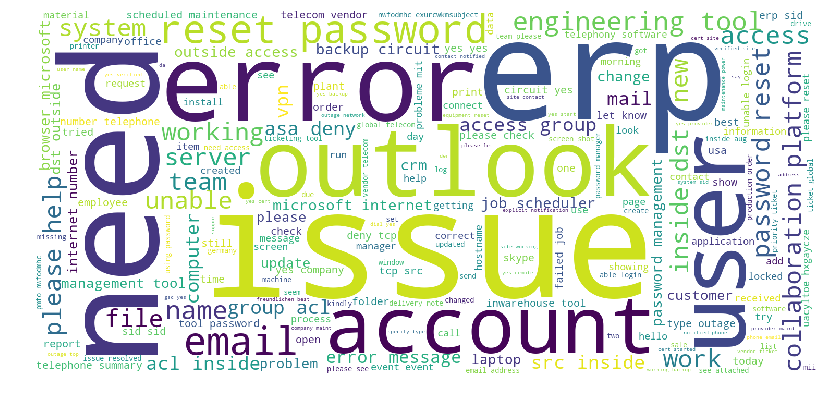

In [45]:
#visual representations of words using wordcloud that give prominence to words on frequency.
wordcld_inp = ' '.join(df_process_txt_acc['Description'].tolist())
wordcloud = WordCloud(background_color="white",width=1500, height=700).generate(wordcld_inp)
plt.figure(figsize=(14,16))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

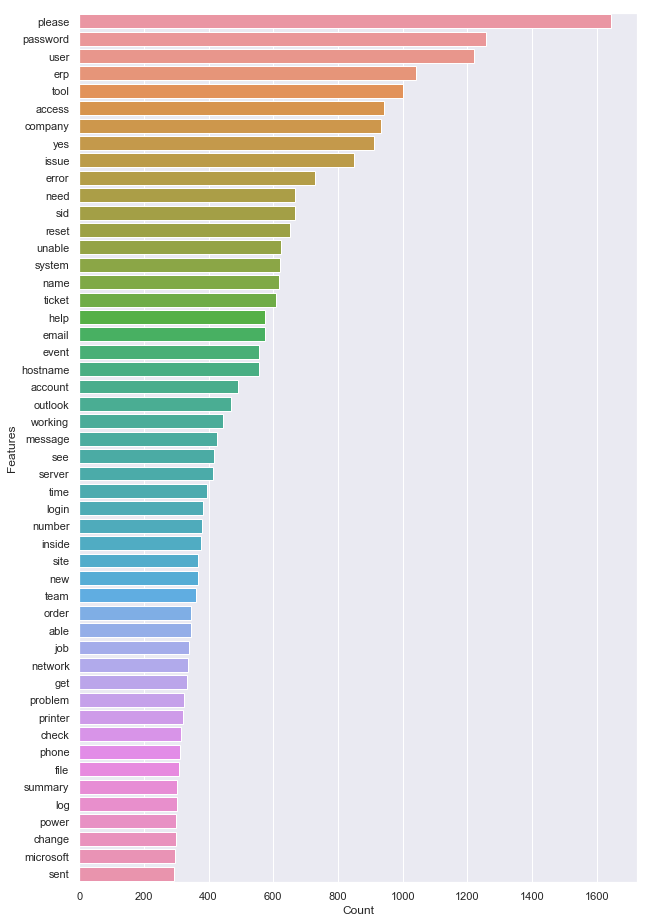

In [46]:
#Plot top 50 features in terms of unigram(1 word)
cvt_uni = CountVectorizer(ngram_range=(1, 1)).fit(df_process_txt_acc['Description'])
cvt_uni_wrds = cvt_uni.transform(df_process_txt_acc['Description'])
uni_sumtn_wrds = cvt_uni_wrds.sum(axis=0)
uni_wrds_occrnc = [(word, uni_sumtn_wrds[0, idx]) for word, idx in cvt_uni.vocabulary_.items()]
uni_wrds_occrnc =sorted(uni_wrds_occrnc, key = lambda x: x[1], reverse=True)
df_uni_top_50_featrs = pd.DataFrame(uni_wrds_occrnc[:50], columns = ['Features' , 'Count'])
plt.figure(figsize=(10,16))
sns.barplot(x="Count", y="Features", data=df_uni_top_50_featrs)
plt.show()

The top features here represents words which have meaning and not just jumbled letters.

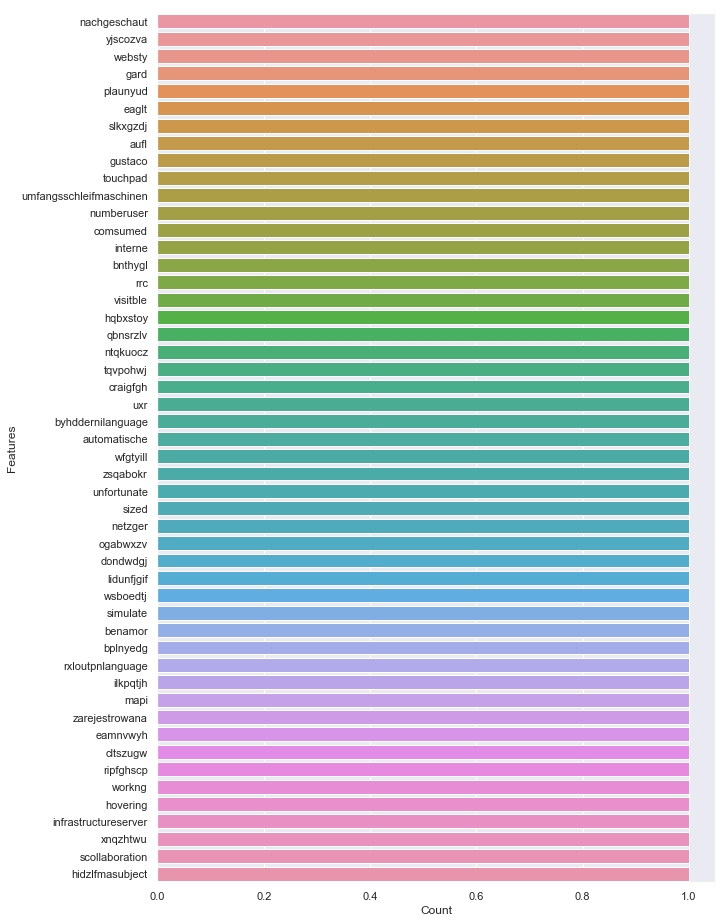

In [47]:
#Plot bottom 50 features in terms of unigram(1 word). Remove no longer required variables to free up memory.
cvt_uni = CountVectorizer(ngram_range=(1, 1)).fit(df_process_txt_acc['Description'])
cvt_uni_wrds = cvt_uni.transform(df_process_txt_acc['Description'])
uni_sumtn_wrds = cvt_uni_wrds.sum(axis=0)
uni_wrds_occrnc = [(word, uni_sumtn_wrds[0, idx]) for word, idx in cvt_uni.vocabulary_.items()]
uni_wrds_occrnc =sorted(uni_wrds_occrnc, key = lambda x: x[1])
df_uni_bot_50_featrs = pd.DataFrame(uni_wrds_occrnc[:50], columns = ['Features' , 'Count'])
plt.figure(figsize=(10,16))
sns.barplot(x="Count", y="Features", data=df_uni_bot_50_featrs)
plt.show()
del wordcld_inp, wordcloud, cvt_uni, cvt_uni_wrds, uni_sumtn_wrds, uni_wrds_occrnc, df_uni_top_50_featrs, df_uni_bot_50_featrs

The bottom features here represents words which are mostly just jumbled[no meaning] letters.

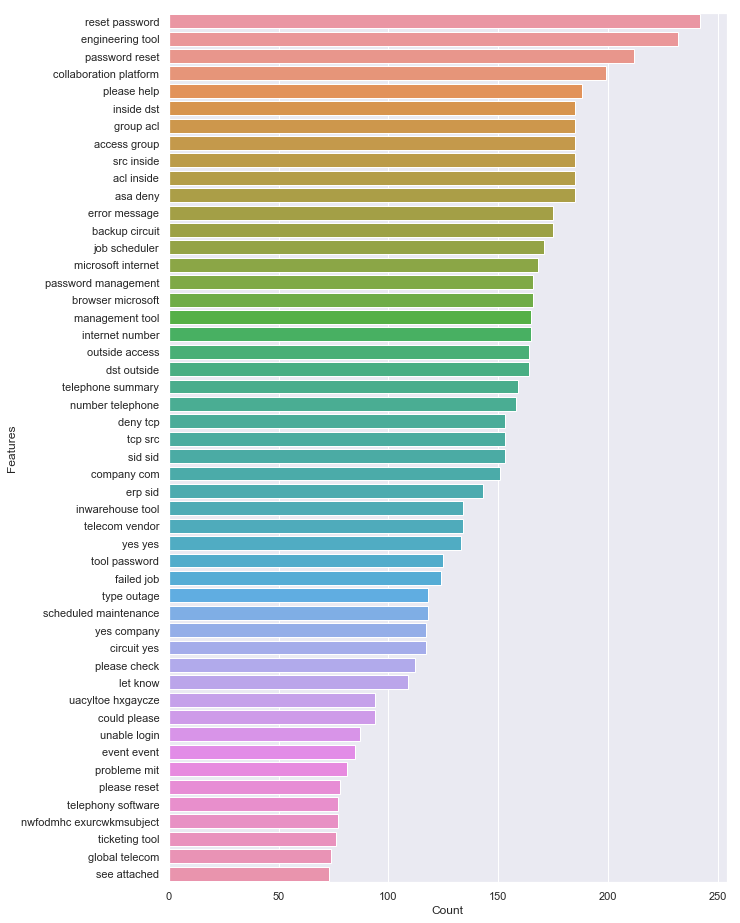

In [48]:
#Plot top 50 features in terms of bigram(2 words)
cvt_bi = CountVectorizer(ngram_range=(2, 2)).fit(df_process_txt_acc['Description'])
cvt_bi_wrds = cvt_bi.transform(df_process_txt_acc['Description'])
bi_sumtn_wrds = cvt_bi_wrds.sum(axis=0)
bi_wrds_occrnc = [(word, bi_sumtn_wrds[0, idx]) for word, idx in cvt_bi.vocabulary_.items()]
bi_wrds_occrnc =sorted(bi_wrds_occrnc, key = lambda x: x[1], reverse=True)
df_bi_top_50_featrs = pd.DataFrame(bi_wrds_occrnc[:50], columns = ['Features' , 'Count'])
plt.figure(figsize=(10,16))
sns.barplot(x="Count", y="Features", data=df_bi_top_50_featrs)
plt.show()

The top features in bigrams represents mostly words which have meaning and not just jumbled words/letters.

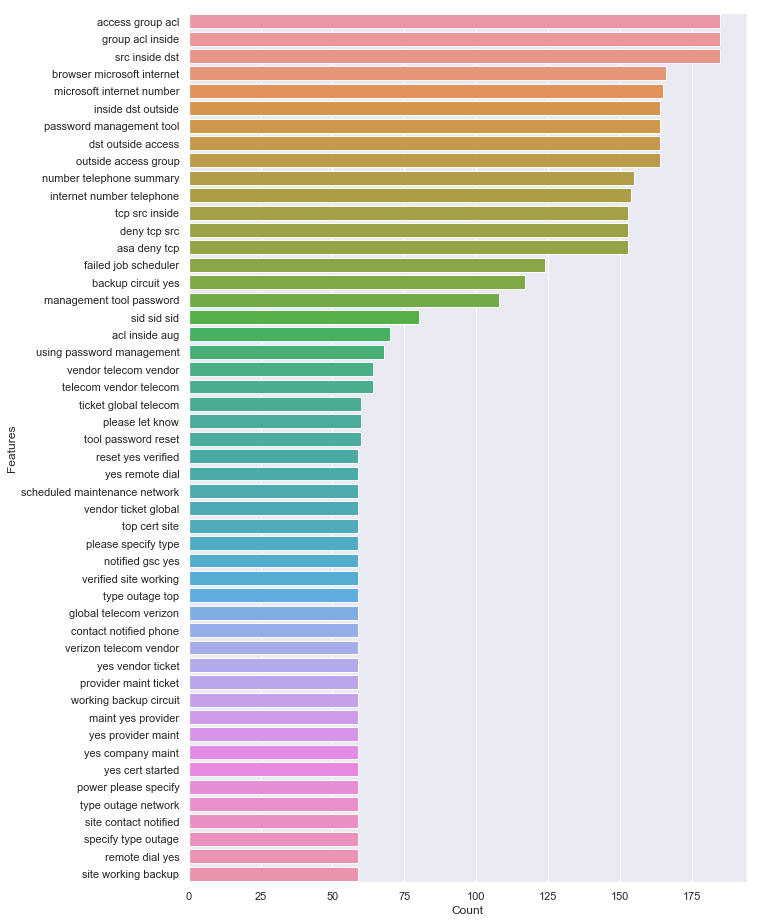

In [49]:
#Plot top 50 features in terms of trigram(3 words). Remove no longer required variables to free up memory.
cvt_tri = CountVectorizer(ngram_range=(3, 3)).fit(df_process_txt_acc['Description'])
cvt_tri_wrds = cvt_tri.transform(df_process_txt_acc['Description'])
tri_sumtn_wrds = cvt_tri_wrds.sum(axis=0)
tri_wrds_occrnc = [(word, tri_sumtn_wrds[0, idx]) for word, idx in cvt_tri.vocabulary_.items()]
tri_wrds_occrnc =sorted(tri_wrds_occrnc, key = lambda x: x[1], reverse=True)
df_tri_top_50_featrs = pd.DataFrame(tri_wrds_occrnc[:50], columns = ['Features' , 'Count'])
plt.figure(figsize=(10,16))
sns.barplot(x="Count", y="Features", data=df_tri_top_50_featrs)
plt.show()
del cvt_bi, cvt_bi_wrds, bi_sumtn_wrds, bi_wrds_occrnc, df_bi_top_50_featrs
del cvt_tri, cvt_tri_wrds, tri_sumtn_wrds, tri_wrds_occrnc, df_tri_top_50_featrs

The top features in trigrams represents mostly words which have meaning and not just jumbled words/letters.

##### Creating tokens

In [50]:
#Considering top 5000 words(possibility of occurence of meaningful/correct english words is more), oov_char for words 
#that were cut out because of the top_num_words while using Tokenizer
top_num_words = 5000
oov_char = "<OOV>"

In [51]:
#Tokenizer to break the sentences to individual tokens and rank them based on the frequencey of appearance. We can use
#this Tokenizer to pad text to sequences of numbers(vectors) for use in neural network.
tokenizer = Tokenizer(num_words=top_num_words, oov_token=oov_char)
tokenizer.fit_on_texts(df_process_txt_acc['Description'].values)

In [52]:
#Tokens in the unigram(1 word), bigram(2 words - more context) and (unigram + bigrams) form with CountVectorizer. We 
#can use these CountVectorizers to tranform the text(vectorize) and train supervised learning algorithms.
cvt_unigram = CountVectorizer(ngram_range=(1, 1)).fit(df_process_txt_acc['Description'])
cvt_bigram = CountVectorizer(ngram_range=(2, 2)).fit(df_process_txt_acc['Description'])
cvt_uni_bigram = CountVectorizer(ngram_range=(1, 2)).fit(df_process_txt_acc['Description'])

##### Word vocabulary

In [53]:
#Get the vocabulary size of Tokenizer tokens. We will add +1 to word index as zero is reserved for padding.
tokenizr_vocabsize=len(tokenizer.word_index)+1
print(tokenizr_vocabsize)

13290


In [54]:
#Get the vocabulary size of CountVectorizer unigram tokens.
cvt_uni_vocabsize=len(cvt_unigram.vocabulary_.items())
print(cvt_uni_vocabsize)

13287


In [55]:
#Get the vocabulary size of CountVectorizer bigram tokens.
cvt_bi_vocabsize=len(cvt_bigram.vocabulary_.items())
print(cvt_bi_vocabsize)

56397


In [56]:
#Get the vocabulary size of CountVectorizer (unigram + bigram) tokens. Remove no longer required variables to 
#free up memory.
cvt_uni_bi_vocabsize=len(cvt_uni_bigram.vocabulary_.items())
print(cvt_uni_bi_vocabsize)
del top_num_words, oov_char, tokenizer, cvt_unigram, cvt_bigram, cvt_uni_bigram
del tokenizr_vocabsize, cvt_uni_vocabsize, cvt_bi_vocabsize, cvt_uni_bi_vocabsize

69684


In [57]:
#Very basic cleaning of base text data for training algorithm to get baseline accuracy. Drop duplicates and empty
#description
df_base_txt_acc["Description"] = df_base_txt_acc["Description"].apply(text_to_lower)
df_base_txt_acc["Description"] = df_base_txt_acc["Description"].apply(rem_punctuations)
df_base_txt_acc["Description"] = df_base_txt_acc["Description"].apply(rem_stpwrds)
df_base_txt_acc.drop_duplicates(['Description','Assignment group'], inplace=True)
df_base_txt_acc = df_base_txt_acc[df_base_txt_acc['Description'].apply(lambda text: len(text.split())>0)]
df_base_txt_acc.head()

,Description,Assignment group
0,verified user details employee manager name ch...,GRP_0
1,received hmjdrvpb komuaywn gmail com hello tea...,GRP_0
2,received eylqgodm ybqkwiam gmail com hi cannot...,GRP_0
3,unable access hr tool page,GRP_0
4,skype error,GRP_0


##### Model Building and Test

In [58]:
#Define X(for features) and y(for target) variables. As our classes/target are non numerical GRP_0, GRP_1 etc, using 
#LabelEncoder to encode classes/target to numerical with value between 0 and numberofclasses-1. Remove no longer 
#required variables to free up memory.
X_base = df_base_txt_acc['Description']
lbl_enc_base = preprocessing.LabelEncoder()
y_base = lbl_enc_base.fit_transform(df_base_txt_acc['Assignment group'])
del df_base_txt_acc

In [59]:
#Split X and y into training and test set in 75:25 ratio. Set random_state for the split to be able to generate the
#same sequence for every run.
X_train_base, X_test_base, y_train_base, y_test_base =train_test_split(X_base,y_base, random_state=7,
                                                   test_size = 0.20)
X_train_base.shape, X_test_base.shape

((6176,), (1544,))

In [60]:
#Using CountVectorizer to convert text documents(non numerical) to a matrix of token counts. Provides a way to extract
#and represent features from text documents.
cvt_base_unigram = CountVectorizer()
X_train_trnsfrm_base = cvt_base_unigram.fit_transform(X_train_base)
X_test_trnsfrm_base = cvt_base_unigram.transform(X_test_base)

In [61]:
#Using Supervised learning algorithm: Multinomial logistic regression for our multi-class classification by having
#the multi_class argument as multinomial and supprted solver lbfgs. We have seen in our analysis above there are
#many classes which have single or two documents sample. Multinomial logistic regression assigns more weight to
#features that helps it to distinguish between probable classes instead of trying to find class from all features.
lr_base = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr_base.fit(X_train_trnsfrm_base, y_train_base)
lr_base_predictions = lr_base.predict(X_test_trnsfrm_base)
print(accuracy_score(y_test_base, lr_base_predictions))
del cvt_base_unigram, X_train_trnsfrm_base, X_test_trnsfrm_base, X_base, lbl_enc_base, y_base, lr_base
del X_train_base, X_test_base, y_train_base, y_test_base, lr_base_predictions

0.6353626943005182


##### Building a supervised learning model architecture

In [62]:
#Using processed text which have spaces removed, email ids removed, lemmatized etc in further steps down.
X = df_process_txt_acc['Description']
lbl_enc = preprocessing.LabelEncoder()
y = lbl_enc.fit_transform(df_process_txt_acc['Assignment group'])

In [63]:
#Split X and y into training and test set in 80:20 ratio. Set random_state for the split.
X_train, X_test, y_train, y_test =train_test_split(X,y, random_state=6,
                                                   test_size = 0.2)
X_train.shape, X_test.shape

((5265,), (1317,))

In [64]:
#Unigram features seen above (eg: password, ticket, failed, issue, reset etc) provides a good meaning/idea and 
#possibly helps in good classification. Using unigram CountVectorizer.
cvt_process_uni = CountVectorizer(ngram_range = (1,1))
X_train_process_uni_trnsfrm = cvt_process_uni.fit_transform(X_train)
X_test_process_uni_trnsfrm = cvt_process_uni.transform(X_test)

In [65]:
#We will use unigram features to train and test algorithm.
lr_process_uni = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr_process_uni.fit(X_train_process_uni_trnsfrm, y_train)
lr_process_uni_predictions = lr_process_uni.predict(X_test_process_uni_trnsfrm)
print(accuracy_score(y_test, lr_process_uni_predictions))
del cvt_process_uni, X_train_process_uni_trnsfrm, X_test_process_uni_trnsfrm, lr_process_uni, lr_process_uni_predictions

0.6378132118451025


In [66]:
#The bottom features seen above contains many words with jumbled letters (rcpt, noif etc seen in our data) which 
#provide no meaning. Will try to reduce the number of features to consider to train algorithm which also reduces 
#training time and memory consumption. Tried with different number of features to be considered.
cvt_process_uni_max = CountVectorizer(ngram_range = (1,1), max_features=7200)
X_train_trnsfrm_uni_max = cvt_process_uni_max.fit_transform(X_train)
X_test_trnsfrm_uni_max = cvt_process_uni_max.transform(X_test)

In [67]:
#We will use reduced unigram features to train and test algorithm.
lr_uni_max = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr_uni_max.fit(X_train_trnsfrm_uni_max, y_train)
lr_uni_max_predictions = lr_uni_max.predict(X_test_trnsfrm_uni_max)
print(accuracy_score(y_test, lr_uni_max_predictions))
del cvt_process_uni_max, X_train_trnsfrm_uni_max, X_test_trnsfrm_uni_max, lr_uni_max, lr_uni_max_predictions 

0.6332574031890661


The vocabulary size of unigrams was nearly 14000, and by considering nearly half of the features, we are still able
to get the accuracy close to 64.

In [68]:
#Bigram features (password reset, password management etc) provides more context which could help with good 
#classification, but also possible the bigrams might mislead because of many jumbled letters words 
#(rcpt, noif etc seen in our data) that could be part of bigrams. Using bigram CountVectorizer.
cvt_process_bi = CountVectorizer(ngram_range = (2,2))
X_train_process_bi_trnsfrm = cvt_process_bi.fit_transform(X_train)
X_test_process_bi_trnsfrm = cvt_process_bi.transform(X_test)

In [69]:
#We will use bigram features to train and test algorithm.
lr_process_uni = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr_process_uni.fit(X_train_process_bi_trnsfrm, y_train)
lr_process_uni_predictions = lr_process_uni.predict(X_test_process_bi_trnsfrm)
print(accuracy_score(y_test, lr_process_uni_predictions))
del cvt_process_bi, X_train_process_bi_trnsfrm, X_test_process_bi_trnsfrm, lr_process_uni, lr_process_uni_predictions

0.5732725892179195


Using bigram features to train and test algorithm does bring down accuracy to some extent than using just unigram features

In [70]:
#We will use best(top) of unigram and bigram features by reducing the max features which could reduce the possibility
#of having jumbled letters words and it would help in both unigram and bigram features. Tried with different number 
#of features to be considered.
cvt_process_unibi_max = CountVectorizer(ngram_range = (1,2), max_features=24900)
X_train_trnsfrm_unibi_max = cvt_process_unibi_max.fit_transform(X_train)
X_test_trnsfrm_unibi_max = cvt_process_unibi_max.transform(X_test)

In [71]:
#Input data to our model for train
X_train_trnsfrm_unibi_max, y_train

(<5265x24900 sparse matrix of type '<class 'numpy.int64'>'
 	with 122346 stored elements in Compressed Sparse Row format>,
 array([72,  5,  4, ..., 72,  0,  0]))

In [72]:
#Input data to our model for test
X_test_trnsfrm_unibi_max, y_test

(<1317x24900 sparse matrix of type '<class 'numpy.int64'>'
 	with 24106 stored elements in Compressed Sparse Row format>,
 array([ 0,  8, 17, ...,  0, 15,  0]))

In [73]:
#Check the unique group values available in train and test data
print(len(np.unique(y_train))), print(len(np.unique(y_test)))
print(np.unique(y_train))
print(np.unique(y_test))

73
59
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 33 34 35 36 37 39 40 41 42 43 44 45 46 47 48 49 51
 53 54 55 56 57 59 60 66 67 72 73]


In [74]:
#We will use reduced unigram and bigram features to train and test algorithm.
lr_unibi_max = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr_unibi_max.fit(X_train_trnsfrm_unibi_max, y_train)
lr_unibi_max_predictions = lr_unibi_max.predict(X_test_trnsfrm_unibi_max)
print(accuracy_score(y_test, lr_unibi_max_predictions))
del cvt_process_unibi_max, lr_unibi_max

0.6340167046317388


In [75]:
#We will use best(top) of unigram, bigram, and trigram features by reducing the max features which could reduce the 
#possibility of having jumbled letters words. Tried with different number of features to be considered.
cvt_process_unibitri_max = CountVectorizer(ngram_range = (1,3), max_features=35000)
X_train_trnsfrm_unibitri_max = cvt_process_unibitri_max.fit_transform(X_train)
X_test_trnsfrm_unibitri_max = cvt_process_unibitri_max.transform(X_test)

In [76]:
#We will use reduced unigram, bigram and trigram features to train and test algorithm.
lr_unibitri_max = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr_unibitri_max.fit(X_train_trnsfrm_unibitri_max, y_train)
lr_unibitri_max_predictions = lr_unibitri_max.predict(X_test_trnsfrm_unibitri_max)
print(accuracy_score(y_test, lr_unibitri_max_predictions))
del cvt_process_unibitri_max, X_train_trnsfrm_unibitri_max, X_test_trnsfrm_unibitri_max, lr_unibitri_max

0.6302201974183751


Using top unigram, bigram, and trigram features accuracy remains almost same, but max features considered increases as well.

In [77]:
#Let us check the classification_report. The predictions of the model which used top unigram and bigram features for 
#training.
print(classification_report(y_test, lr_unibi_max_predictions, digits=2))

              precision    recall  f1-score   support

           0       0.66      0.94      0.78       642
           1       0.50      0.25      0.33         4
           2       0.50      0.09      0.15        22
           3       0.00      0.00      0.00         6
           4       0.71      0.54      0.62        46
           5       0.55      0.44      0.49        27
           6       0.64      0.36      0.46        25
           7       1.00      0.33      0.50         6
           8       0.50      0.20      0.29        20
           9       1.00      0.86      0.92         7
          10       0.55      0.40      0.46        15
          11       0.30      0.20      0.24        35
          12       0.55      0.37      0.44        43
          13       1.00      0.14      0.25         7
          14       0.00      0.00      0.00         6
          15       1.00      0.25      0.40         4
          16       0.50      0.17      0.25         6
          17       0.93    

In [78]:
#Let us check the classification_report. The predictions of the model which used top unigram, bigram and trigram 
#features for training.
print(classification_report(y_test, lr_unibitri_max_predictions, digits=2))
del lr_unibi_max_predictions, lr_unibitri_max_predictions

              precision    recall  f1-score   support

           0       0.66      0.93      0.77       642
           1       0.50      0.25      0.33         4
           2       0.50      0.09      0.15        22
           3       0.00      0.00      0.00         6
           4       0.69      0.52      0.59        46
           5       0.58      0.52      0.55        27
           6       0.62      0.32      0.42        25
           7       1.00      0.17      0.29         6
           8       0.67      0.20      0.31        20
           9       1.00      0.86      0.92         7
          10       0.45      0.33      0.38        15
          11       0.29      0.20      0.24        35
          12       0.53      0.40      0.45        43
          13       1.00      0.14      0.25         7
          14       1.00      0.17      0.29         6
          15       0.00      0.00      0.00         4
          16       0.50      0.17      0.25         6
          17       0.92    

The Model(Model_Uni_Bigram) which was trained on combination of unigram and bigram with max_features=24900 was able to perform slightly better(63.40 vs 63.02) than the Model(Model_Uni_Bi_Trigram) which was trained on combination of unigram, bigram, and trigram with max_features=35000. Also, bigram features could be helpful after performing text agumentation. We also have additional advantage of reduced number of features in a Model_Uni_Bigram which will help to compute faster and occupy less memory while accuracy remains good.

##### Build different models

We will use reduced unigram and bigram features vectorized data that gave good accuracy to test supervised learning models [RandomForestClassifier, MultinomialNB, SVC]

In [79]:
#Score RandomForestClassifier.
rf_unibi_max = RandomForestClassifier()
rf_unibi_max.fit(X_train_trnsfrm_unibi_max, y_train)
rf_unibi_max_predictions = rf_unibi_max.predict(X_test_trnsfrm_unibi_max)
print(accuracy_score(y_test, rf_unibi_max_predictions))
del rf_unibi_max

0.5968109339407744


In [80]:
#Score Naive Bayes Classifier.
nb_unibi_max = MultinomialNB()
nb_unibi_max.fit(X_train_trnsfrm_unibi_max, y_train)
nb_unibi_max_predictions = nb_unibi_max.predict(X_test_trnsfrm_unibi_max)
print(accuracy_score(y_test, nb_unibi_max_predictions))
del nb_unibi_max

0.6044039483675019


In [81]:
#Score Support Vector Classifier
svm_unibi_max = SVC()
svm_unibi_max.fit(X_train_trnsfrm_unibi_max, y_train)
svm_unibi_max_predictions = svm_unibi_max.predict(X_test_trnsfrm_unibi_max)
print(accuracy_score(y_test, svm_unibi_max_predictions))
del svm_unibi_max

0.5725132877752468


The Naive Bayes is the one which performs better than RandomForestClassifier and Support Vector Classifier, but still falls behind the LogisticRegression Classifer

In [82]:
#Let us check the classification_report of Naive Bayes. 
print(classification_report(y_test, nb_unibi_max_predictions, digits=2))
del X, y, X_train, X_test, y_train, y_test, X_train_trnsfrm_unibi_max, X_test_trnsfrm_unibi_max
del rf_unibi_max_predictions, nb_unibi_max_predictions, svm_unibi_max_predictions

              precision    recall  f1-score   support

           0       0.59      0.98      0.74       642
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00        22
           3       0.00      0.00      0.00         6
           4       0.65      0.48      0.55        46
           5       0.53      0.37      0.43        27
           6       0.60      0.24      0.34        25
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00        20
           9       0.00      0.00      0.00         7
          10       0.60      0.20      0.30        15
          11       0.80      0.11      0.20        35
          12       0.55      0.40      0.46        43
          13       0.00      0.00      0.00         7
          14       0.00      0.00      0.00         6
          15       0.00      0.00      0.00         4
          16       0.00      0.00      0.00         6
          17       0.85    

The classification report above shows that the overall accuracy is lesser and also more number of individual classes do not have any accuracy compare to LogisticRegression Classifier. The LogisticRegression Classifier performs better than other supervised learning models [RandomForestClassifier, MultinomialNB, SVC]

##### Building a Neural Network model architecture

The documents/texts are sequential. It is a sequence of words following grammatical structure. We will use the Sequential Model after creating the features by tokenizing the text, converting to vector and applying padding

In [83]:
#Initialize the random state
def reset_seeds(sed):
   np.random.seed(sed) 
   python_random.seed(sed)
   tf.set_random_seed(sed)
reset_seeds(9)

In [84]:
#Defining params top_num_words for most frequent words from dataset, embedding_dim for the output dimension of our
#embedding layer, oov_char for words that were cut out because of the top_num_words, pad_type to append 0 at beggining
#or end of a text which is shorter than maximum length text, trunc_type for removing the words from beggining or end 
#of a text which exceeds maximum length text. The documents/texts are of various lengths. The mean length is around 30.
#There are many outliers. We will consider max length of 35 in our tokenizer's pad sequences to add up some deviation.
top_num_words = 5000
embedding_dim = 300
oov_char = "<OOV>"
pad_type = "pre"
trunc_type = "pre"
max_length = 35
loss_fn = 'categorical_crossentropy'
optimizer_alg='adam'
metric_eval = 'accuracy'

In [85]:
#Fit tokenizer on texts to break the sentences to individual tokens and rank them based on the frequencey of 
#appearance.
tknzr = Tokenizer(num_words=top_num_words, oov_token=oov_char)
tknzr.fit_on_texts(df_process_txt_acc['Description'])

In [86]:
#Creating the features by converting our text to sequences. Truncate the ones which are more than max_length, and
#applying padding (add 0) to the sequences which are shorter until it is of max_length size.
X_seq = tknzr.texts_to_sequences(df_process_txt_acc['Description'])
X_seq_pad = pad_sequences(X_seq, padding=pad_type, truncating=trunc_type, maxlen=max_length)

In [87]:
#Using get dummies function to convert categorical variables into dummy variables that can be understood by model
y_seq = pd.get_dummies(df_process_txt_acc['Assignment group']).values

In [88]:
#Get the vocabulary size. We will add +1 to word index as zero is reserved for padding.
tknz_vocabsize =len(tknzr.word_index)+1
print(tknz_vocabsize)

13290


In [89]:
# Split text and class data into training and test set in 80:20 ratio.
X_train_Seq, X_test_Seq, y_train_Seq, y_test_Seq = train_test_split(X_seq_pad, y_seq, test_size=0.20, random_state=6)
X_train_Seq.shape, X_test_Seq.shape

((5265, 35), (1317, 35))

In [90]:
#Input data to our model for train
X_train_Seq, y_train_Seq

(array([[   0,    0,    0, ..., 2862, 4165,    1],
        [  11,   26,  156, ...,  795,  276,   41],
        [   0,    0,    0, ...,   22,   22,  365],
        ...,
        [   0,    0,    0, ...,  381,   28,   33],
        [   0,    0,    0, ...,  255,  246, 3885],
        [   0,    0,    0, ...,    1,  621,    1]], dtype=int32),
 array([[0, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 1, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0]], dtype=uint8))

In [91]:
#Input data to our model for test
X_test_Seq, y_test_Seq

(array([[   0,    0,    0, ...,    0,   20,   25],
        [   0,    0,    0, ..., 2619,    2,  262],
        [   0,    0,    0, ...,  408, 2874, 2875],
        ...,
        [   0,    0,    0, ...,   30,   95,   91],
        [   0,    0,    0, ...,    1,    1,  102],
        [   0,    0,    0, ...,    1,  513,   86]], dtype=int32),
 array([[1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0]], dtype=uint8))

##### Build different models

Sequential model with LSTM (Long Short-Term Memory) to train and classify our documents. LSTM (Long Short-Term Memory) network is a type of RNN (Recurrent Neural Network). It can memorize patterns. It uses a series of gates(input gate, output gate and forget gate) to control how the information in a sequence of data comes in, how it is stored and leaves the network.

In [92]:
#Build a Sequential model with LSTM layer
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=tknz_vocabsize, output_dim=embedding_dim, input_length=max_length))
model_lstm.add(LSTM(100))
model_lstm.add(Dense(100, activation = "relu"))
model_lstm.add(Dense(74,activation='softmax'))

In [93]:
#compile and fit the model
model_lstm.compile(loss = loss_fn, optimizer=optimizer_alg,metrics = [metric_eval])
model_lstm.fit(X_train_Seq, y_train_Seq, epochs = 5, batch_size=128, verbose = 0,validation_split=0.25)

In [94]:
#loss and accuracy
model_lstm.evaluate(X_test_Seq, y_test_Seq)

1317/1317 [==============================] - 0s 331us/step


[2.18423331879085, 0.5292331056334163]

In [95]:
#Save the weights
model_lstm.save_weights("model_lstm.h5")

The Bidirectional LSTM propagates the input forwards and backwards through the LSTM layer, and concatenates the outputs. It increase the amount of information available to the network by knowing the words that follow and precede a word in a sentence

In [96]:
#Build a Sequential model with Bidirectional LSTM layer
model_lstmbi = Sequential()
model_lstmbi.add(Embedding(input_dim=tknz_vocabsize, output_dim=embedding_dim, input_length=max_length))
model_lstmbi.add(Bidirectional(LSTM(10)))
model_lstmbi.add(Dense(100, activation = "relu"))
model_lstmbi.add(Dense(74,activation='softmax'))

In [97]:
#compile and fit the model
model_lstmbi.compile(loss = loss_fn, optimizer=optimizer_alg,metrics = [metric_eval])
model_lstmbi.fit(X_train_Seq, y_train_Seq, epochs = 5, batch_size=32, verbose = 0,validation_split=0.25)

In [98]:
#loss and accuracy
model_lstmbi.evaluate(X_test_Seq, y_test_Seq)

1317/1317 [==============================] - 0s 279us/step


[2.0970806782229343, 0.5466970387470025]

In [99]:
#Save the weights
model_lstmbi.save_weights("model_lstmbi.h5")
del tknzr, X_seq, X_seq_pad, y_seq, tknz_vocabsize
del model_lstm, X_train_Seq, y_train_Seq, model_lstmbi, X_test_Seq, y_test_Seq

In the above train-test splits we could not have all unique group values available in both train and test split as it is imbalanced data which you can see below

In [100]:
#Check number of documents in the groups
df_process_txt_acc["Assignment group"].value_counts()

GRP_0     3065
GRP_24     277
GRP_2      240
GRP_12     238
GRP_8      234
GRP_19     213
GRP_3      200
GRP_13     142
GRP_14     118
GRP_25     116
GRP_33     106
GRP_29      97
GRP_4       91
GRP_16      85
GRP_18      84
GRP_10      82
GRP_9       78
GRP_6       70
GRP_7       67
GRP_17      63
GRP_34      62
GRP_26      56
GRP_31      55
GRP_5       50
GRP_40      45
GRP_28      44
GRP_41      39
GRP_15      38
GRP_42      37
GRP_20      36
          ... 
GRP_50      14
GRP_60      11
GRP_65      11
GRP_53      11
GRP_52       9
GRP_51       8
GRP_55       8
GRP_48       7
GRP_49       6
GRP_46       6
GRP_59       6
GRP_43       5
GRP_32       4
GRP_63       3
GRP_38       3
GRP_56       3
GRP_66       3
GRP_68       3
GRP_58       3
GRP_71       2
GRP_54       2
GRP_69       2
GRP_57       2
GRP_72       2
GRP_64       1
GRP_67       1
GRP_35       1
GRP_70       1
GRP_73       1
GRP_61       1
Name: Assignment group, Length: 74, dtype: int64

Let's create documents for the groups[GRP_64, GRP_73, GRP_35, GRP_61, GRP_67, GRP_70] by agumenting data with synonyms. Divide the dataframe into three parts(greater than 2 counts, equal to 2 counts, lesser than 2 counts) and finally prepare the train test split to have all unique group values available in both train side and test side data.

In [101]:
#Filter the dataframe to get the groups with more than 2 counts
df_process_txt_acc_cpc = copy.deepcopy(df_process_txt_acc)
df_process_grtr_2 = df_process_txt_acc_cpc.groupby("Assignment group").filter(lambda x: len(x) > 2)
df_process_grtr_2.shape

(6566, 2)

In [102]:
#Filter the dataframe to get the groups equal to 2 counts
df_process_eql2 = df_process_txt_acc_cpc.groupby("Assignment group").filter(lambda x: len(x) == 2)
df_process_eql2.shape

(10, 2)

In [103]:
#Filter the dataframe to get the groups with less than 2 counts
df_process_lssr2 = df_process_txt_acc_cpc.groupby("Assignment group").filter(lambda x: len(x) < 2)
df_process_lssr2.shape

(6, 2)

In [104]:
#SynonymAug Augmenter that leverage semantic meaning to substitute word from wordnet(WordNet is a lexical database of 
#semantic relations between words. It links words into semantic relations including synonyms)
syno_aug = naw.SynonymAug(aug_p=0.5)
def aug_syno_text(text):
    try:        
        return syno_aug.augment(text)
    except:
        return text

In [105]:
#Apply text agumentation through SynonymAug Augmenter for dataframe containing groups with less than 2 counts
df_process_lssr2_cpc = copy.deepcopy(df_process_lssr2)
df_process_lssr2_cpc["Description"] = df_process_lssr2_cpc["Description"].apply(aug_syno_text)
df_process_lssr2_cpc.shape

(6, 2)

In [106]:
#Concatinating dataframe containing groups with less than 2 counts and it's synonym text agumented data
df_process_txt_lss2_aug = pd.concat([df_process_lssr2, df_process_lssr2_cpc])
df_process_txt_lss2_aug.shape

(12, 2)

In [107]:
#Start to prepare train and test split. First consider values from dataframe which has groups with more than 2 counts
#Stratify on y('Assignment group')
X_strat = df_process_grtr_2['Description']
y_strat = df_process_grtr_2['Assignment group']

X_train_strat, X_test_strat, y_train_strat, y_test_strat =train_test_split(X_strat,y_strat, random_state=6,
                                                   test_size = 0.25, stratify=y_strat)
print(len(np.unique(y_train_strat)))
print(len(np.unique(y_test_strat)))
del df_process_txt_acc_cpc, df_process_grtr_2, df_process_lssr2, df_process_lssr2_cpc

63
63


In [108]:
#Manually add groups from dataframe which has groups equal to 2 counts into train and test data
for idx, row in copy.deepcopy(df_process_eql2).iterrows():
    if not np.isin(row['Assignment group'], y_train_strat):
        X_train_strat = X_train_strat.append(pd.Series(row['Description'], index=[idx]))
        y_train_strat = np.append(y_train_strat, row['Assignment group'])
    elif not np.isin(row['Assignment group'], y_test_strat):
            X_test_strat = X_test_strat.append(pd.Series(row['Description'], index=[idx]))
            y_test_strat = np.append(y_test_strat, row['Assignment group'])
print(len(np.unique(y_train_strat)))
print(len(np.unique(y_test_strat)))
del X_strat, y_strat, df_process_eql2

68
68


In [109]:
#Manually add groups from dataframe which has groups with less than 2 counts and it's synonym text agumented data into
#train and test data. Remove no longer required variables to free up memory.
for idx, row in copy.deepcopy(df_process_txt_lss2_aug).iterrows():
    if not np.isin(row['Assignment group'], y_train_strat):
        X_train_strat = X_train_strat.append(pd.Series(row['Description'], index=[idx]))
        y_train_strat = np.append(y_train_strat, row['Assignment group'])
    elif not np.isin(row['Assignment group'], y_test_strat):
            X_test_strat = X_test_strat.append(pd.Series(row['Description'], index=[idx]))
            y_test_strat = np.append(y_test_strat, row['Assignment group'])
print(len(np.unique(y_train_strat)))
print(len(np.unique(y_test_strat)))
del df_process_txt_lss2_aug

74
74


In [110]:
#All unique groups['GRP_0' to 'GRP_73'] available in both train and test data
print(X_train_strat.shape), print(X_test_strat.shape)
print(np.unique(y_train_strat))
print(np.unique(y_test_strat))

(4935,)
(1653,)
['GRP_0' 'GRP_1' 'GRP_10' 'GRP_11' 'GRP_12' 'GRP_13' 'GRP_14' 'GRP_15'
 'GRP_16' 'GRP_17' 'GRP_18' 'GRP_19' 'GRP_2' 'GRP_20' 'GRP_21' 'GRP_22'
 'GRP_23' 'GRP_24' 'GRP_25' 'GRP_26' 'GRP_27' 'GRP_28' 'GRP_29' 'GRP_3'
 'GRP_30' 'GRP_31' 'GRP_32' 'GRP_33' 'GRP_34' 'GRP_35' 'GRP_36' 'GRP_37'
 'GRP_38' 'GRP_39' 'GRP_4' 'GRP_40' 'GRP_41' 'GRP_42' 'GRP_43' 'GRP_44'
 'GRP_45' 'GRP_46' 'GRP_47' 'GRP_48' 'GRP_49' 'GRP_5' 'GRP_50' 'GRP_51'
 'GRP_52' 'GRP_53' 'GRP_54' 'GRP_55' 'GRP_56' 'GRP_57' 'GRP_58' 'GRP_59'
 'GRP_6' 'GRP_60' 'GRP_61' 'GRP_62' 'GRP_63' 'GRP_64' 'GRP_65' 'GRP_66'
 'GRP_67' 'GRP_68' 'GRP_69' 'GRP_7' 'GRP_70' 'GRP_71' 'GRP_72' 'GRP_73'
 'GRP_8' 'GRP_9']
['GRP_0' 'GRP_1' 'GRP_10' 'GRP_11' 'GRP_12' 'GRP_13' 'GRP_14' 'GRP_15'
 'GRP_16' 'GRP_17' 'GRP_18' 'GRP_19' 'GRP_2' 'GRP_20' 'GRP_21' 'GRP_22'
 'GRP_23' 'GRP_24' 'GRP_25' 'GRP_26' 'GRP_27' 'GRP_28' 'GRP_29' 'GRP_3'
 'GRP_30' 'GRP_31' 'GRP_32' 'GRP_33' 'GRP_34' 'GRP_35' 'GRP_36' 'GRP_37'
 'GRP_38' 'GRP_39' 'GRP_4' 'G

In [111]:
#We will use the CountVectorizer with uni bigram features that we selected above after analysis. Using LabelEncoder to
#encode classes/target to numerical with value between 0 and numberofclasses-1
#Function to use the CountVectorizer.
def lr_cvt_unibi_eval(X_train_strat_parm, y_train_strat_parm, X_test_strat_parm, y_test_strat_parm):
    cvt_process_strat_unibi_max = CountVectorizer(ngram_range = (1,2), max_features=24900)
    X_train_strat_unibi_max = cvt_process_strat_unibi_max.fit_transform(X_train_strat_parm)
    X_test_strat_unibi_max = cvt_process_strat_unibi_max.transform(X_test_strat_parm)
    
    lbl_enc_strat = preprocessing.LabelEncoder()
    y_train_enc_strat = lbl_enc_strat.fit_transform(y_train_strat_parm)
    y_test_enc_strat = lbl_enc_strat.fit_transform(y_test_strat_parm)

    lr_unibi_max_strat = LogisticRegression(multi_class='multinomial', solver='lbfgs')
    lr_unibi_max_strat.fit(X_train_strat_unibi_max, y_train_enc_strat)
    lr_unibi_max_strat_predictions = lr_unibi_max_strat.predict(X_test_strat_unibi_max)
    return accuracy_score(y_test_enc_strat, lr_unibi_max_strat_predictions)

In [112]:
#We will use Logistic Regression with reduced unigram, bigram features to train and test algorithm.
print("Accuracy:{}".format(lr_cvt_unibi_eval(X_train_strat, y_train_strat, X_test_strat, y_test_strat)))

Accuracy:0.6134301270417423


Performance of Model Uni_bigram considering all unique groups for train and test is at closer range to earlier performance.

In [113]:
#Function to build a Sequential model with Bidirectional LSTM layer and keras Embedding layer, compile, fit 
#and evaluate
def seq_lstm_bi_eval(X_train_strat_parm, y_train_strat_parm, X_test_strat_parm, y_test_strat_parm):
    tknzr_strat = Tokenizer(num_words=top_num_words, oov_token=oov_char)
    tknzr_strat.fit_on_texts(X_train_strat_parm.append(X_test_strat_parm))
    tknz_strat_vocabsize =len(tknzr_strat.word_index)+1
    
    X_train_strat_seq = tknzr_strat.texts_to_sequences(X_train_strat_parm)
    X_train_strat_seq_pad = pad_sequences(X_train_strat_seq, padding=pad_type, truncating=trunc_type, maxlen=max_length)
    X_test_strat_seq = tknzr_strat.texts_to_sequences(X_test_strat_parm)
    X_test_strat_seq_pad = pad_sequences(X_test_strat_seq, padding=pad_type, truncating=trunc_type, maxlen=max_length)
    
    lbl_enc_tknzr_strat = preprocessing.LabelEncoder()
    y_train_strat_tknzr = pd.get_dummies(lbl_enc_tknzr_strat.fit_transform(y_train_strat_parm)).values
    y_test_strat_tknzr = pd.get_dummies(lbl_enc_tknzr_strat.fit_transform(y_test_strat_parm)).values    
    
    model_strat = Sequential()
    model_strat.add(Embedding(input_dim=tknz_strat_vocabsize, output_dim=embedding_dim, input_length=max_length))
    model_strat.add(Bidirectional(LSTM(10)))
    model_strat.add(Dense(100, activation = "relu"))
    model_strat.add(Dense(74,activation='softmax'))
    
    model_strat.compile(loss = loss_fn, optimizer=optimizer_alg,metrics = [metric_eval])
    model_strat.fit(X_train_strat_seq_pad, y_train_strat_tknzr, epochs = 5, batch_size=32, verbose = 0,validation_split=0.25)
    
    return model_strat.evaluate(X_test_strat_seq_pad, y_test_strat_tknzr)

In [114]:
#We will use Sequential model with Bidirectional LSTM layer to train and test algorithm.
print("Accuracy:{}".format(seq_lstm_bi_eval(X_train_strat, y_train_strat, X_test_strat, y_test_strat)))

1653/1653 [==============================] - 0s 301us/step
Accuracy:[2.2823932567511047, 0.516636418795052]


Performance of Sequential Model with  Bidirectional LSTM layer considering all unique groups for train and test is at closer range to earlier performance.

In [115]:
#Function to create glove embedding matrix to use it in Neural Network Sequential Model
def weight_matrx_glv_embed(glove_embd_path, embedding_dim, tknzr_parm):    
    embeddings_word_val = {}
    lowrds=[]
    
    f = open(glove_embd_path)
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_word_val[word] = coefs
    f.close()

    tknzr_parm_vocabsize = len(tknzr_parm.word_index)+1
    embedding_matrix=np.zeros((tknzr_parm_vocabsize,embedding_dim))
    for word,idx in tknzr_parm.word_index.items():
        try:
            embedding_vector=embeddings_word_val[word]
            embedding_matrix[idx]=embedding_vector
        except:
            lowrds.append(word)
    return embedding_matrix

In [116]:
#Function to build a Sequential model with Bidirectional LSTM layer and Glove Embedding layer, compile, fit 
#and evaluate
def seq_lstm_bi_glv_eval(X_train_strat_parm, y_train_strat_parm, X_test_strat_parm, 
                     y_test_strat_parm, glv_embed_path, dimension_parm, last_dense_layer=74):
    tknzr_strat = Tokenizer(num_words=top_num_words, oov_token=oov_char)
    tknzr_strat.fit_on_texts(X_train_strat_parm.append(X_test_strat_parm))
    tknz_strat_vocabsize =len(tknzr_strat.word_index)+1
    
    X_train_strat_seq = tknzr_strat.texts_to_sequences(X_train_strat_parm)
    X_train_strat_seq_pad = pad_sequences(X_train_strat_seq, padding=pad_type, truncating=trunc_type, maxlen=max_length)
    X_test_strat_seq = tknzr_strat.texts_to_sequences(X_test_strat_parm)
    X_test_strat_seq_pad = pad_sequences(X_test_strat_seq, padding=pad_type, truncating=trunc_type, maxlen=max_length)
    
    lbl_enc_tknzr_strat = preprocessing.LabelEncoder()
    y_train_strat_tknzr = pd.get_dummies(lbl_enc_tknzr_strat.fit_transform(y_train_strat_parm)).values
    y_test_strat_tknzr = pd.get_dummies(lbl_enc_tknzr_strat.fit_transform(y_test_strat_parm)).values
    
    embedding_matrix_strat = weight_matrx_glv_embed(glv_embed_path, dimension_parm, tknzr_strat)    
        
    model_strat = Sequential()
    model_strat.add(Embedding(input_dim=tknz_strat_vocabsize, output_dim=dimension_parm, weights=[embedding_matrix_strat], 
                              input_length=max_length, trainable=True))
    model_strat.add(Bidirectional(LSTM(10)))
    model_strat.add(Dense(100, activation = "relu"))
    model_strat.add(Dense(last_dense_layer,activation='softmax'))
    
    model_strat.compile(loss = loss_fn, optimizer=optimizer_alg,metrics = [metric_eval])
    model_strat.fit(X_train_strat_seq_pad, y_train_strat_tknzr, epochs = 5, batch_size=32, verbose = 0,validation_split=0.25)
    
    return model_strat.evaluate(X_test_strat_seq_pad, y_test_strat_tknzr)

In [117]:
#We will use Sequential model with Bidirectional LSTM layer and Glove 300 dimensional embedding to train and test 
#algorithm.
print("Accuracy:{}".format(seq_lstm_bi_glv_eval(X_train_strat, y_train_strat, 
                                            X_test_strat, y_test_strat, './glove.6B.300d.txt', 300)))

1653/1653 [==============================] - 1s 320us/step
Accuracy:[2.070863858180845, 0.5402298852197344]


Performance of Sequential Model with Bidirectional LSTM layer and Glove 300 dimensional embedding considering all unique groups for train and test holds out at closer range to earlier performance.

The initial performance of LogisticRegression and Sequential Model where we did not focus on having all unique groups/target available in train, test data and later performance of LogisticRegression and Sequential Model where we made sure to have all unique groups/target available in train, test data and the one where we used Glove pretrained embedding remains almost at same range 61-63 percent and 51-54 percent accuracy respectively. 

We will try to handle class imbalance using sklearn resample which creates a random resampling with(default=True)/without replacement of data and evaluate the performance of models. We will be using the train and test data that has all unique groups available in them

In [118]:
#Create random resample with replacement for groups/target with counts less than 150. Using the train data and 
#upsampling it. Tried with different number of random samples.
resampl_df = pd.DataFrame({ 'Assignment group': y_train_strat, 'Description': X_train_strat })
df_grt_150_rl = resampl_df.groupby("Assignment group").filter(lambda x: len(x) > 150)
df_lssr_150_rl = resampl_df.groupby("Assignment group").filter(lambda x: len(x) <= 150)
df_lssr_150_rl_upsampl = resample(df_lssr_150_rl, n_samples=len(df_grt_150_rl), random_state=6)
df_rl_upsampld = pd.concat([df_grt_150_rl, df_lssr_150_rl_upsampl])
df_grt_150_rl.shape, df_lssr_150_rl.shape, df_lssr_150_rl_upsampl.shape

((3200, 2), (1735, 2), (3200, 2))

In [119]:
#We will use Logistic Regression with reduced unigram, bigram features to train and test algorithm. Using the train
#data that is random upsampled and evaluating performance
print("Accuracy:{}".format(lr_cvt_unibi_eval(df_rl_upsampld['Description'], df_rl_upsampld['Assignment group'], 
                                             X_test_strat, y_test_strat)))
del resampl_df, df_grt_150_rl, df_lssr_150_rl, df_lssr_150_rl_upsampl

Accuracy:0.6158499697519662


In [120]:
#We will use Sequential model with Bidirectional LSTM layer and Glove 300 dimensional embedding to train and test 
#algorithm. Using the train data that is random upsampled and evaluating performance
print("Accuracy:{}".format(seq_lstm_bi_glv_eval(df_rl_upsampld['Description'], df_rl_upsampld['Assignment group'], 
                                            X_test_strat, y_test_strat, './glove.6B.300d.txt', 300)))
del df_rl_upsampld

1653/1653 [==============================] - 1s 324us/step
Accuracy:[2.153939386749729, 0.5589836661879106]


The performance of LogisticRegression and Sequential Model with Glove pretrained embedding layer using the upsampled train data, evaluating performance is at range 61-63 percent and 51-55 percent accuracy respectively.

We will try to handle class imbalance using various text augmentation techniques on groups with less or equal to 100 counts/documents and evaluate the performance of models. We will be using the train and test data that has all unique groups available in them

In [121]:
#Function: Translate text augmentation technique to generate documents/text by converting text in english to different 
#language[Here: German(de)] then back to english. This could help us get the documents which gives similar 
#context/meaning with different words. 
def translt_text(text):
    try:
        txt_blb = TextBlob(text)
        txt_blb_trans = txt_blb.translate(from_lang='en', to='de')
        txt_blb_bck = txt_blb_trans.translate(from_lang='de', to='en')
        return txt_blb_bck
    except:
        return text  

In [122]:
#Function: Using the train data and performing text augmentation on groups with less than number of documents that is 
#passed as argument to function. Removing any duplicates and returning the dataframe with non augmentated[groups with
#more than number of documents that is passed as argument] and text augmentated data. 
def aug_text_data(X_train_strat_parm, y_train_strat_parm, no_of_docs, text_aug_fn):
    
    df_aug = pd.DataFrame({ 'Description': X_train_strat_parm, 'Assignment group': y_train_strat_parm })
    df_grt_no_of_docs = df_aug.groupby("Assignment group").filter(lambda x: len(x) > no_of_docs)

    new_aug_dfs_lst = []
    grouped_trgts = df_aug.groupby('Assignment group')
    for key, item in grouped_trgts:
        df_grp_trgt = grouped_trgts.get_group(key)      
        if len(df_grp_trgt) <= no_of_docs:        
            sampls_size_2_increase = (no_of_docs - len(df_grp_trgt))       
            if sampls_size_2_increase < len(df_grp_trgt):
                df_lssr_aug_grptrgt = copy.deepcopy(df_grp_trgt.sample(n=sampls_size_2_increase))
                df_lssr_aug_grptrgt["Description"] = df_lssr_aug_grptrgt["Description"].apply(text_aug_fn)
                new_aug_dfs_lst.append(pd.concat([df_grp_trgt,df_lssr_aug_grptrgt]))
            else:
                rng = math.ceil(sampls_size_2_increase/len(df_grp_trgt))
                df_grt_ln_aug_grptrgt = copy.deepcopy(df_grp_trgt)
                lssr_div_aug_dfs_lst = []
                for i in range(0, rng):
                    if i==0:
                        df_grt_ln_aug_grptrgt["Description"] = df_grt_ln_aug_grptrgt["Description"].apply(text_aug_fn)
                    else:
                        df_grt_ln_aug_grptrgt = copy.deepcopy(lssr_div_aug_dfs_lst[i-1])
                        df_grt_ln_aug_grptrgt["Description"] = df_grt_ln_aug_grptrgt["Description"].apply(text_aug_fn)
                    lssr_div_aug_dfs_lst.append(df_grt_ln_aug_grptrgt)
                lssr_div_aug_dfs_lst.append(df_grp_trgt)
                new_aug_dfs_lst.append(pd.concat(lssr_div_aug_dfs_lst))
    new_aug_df = pd.concat(new_aug_dfs_lst)

    df_grtr_lssr_aug = pd.concat([df_grt_no_of_docs, new_aug_df])
    df_grtr_lssr_aug.drop_duplicates(['Description','Assignment group'], inplace=True)
    return df_grtr_lssr_aug

In [123]:
#We will use Logistic Regression with reduced unigram, bigram features to train and test algorithm. Using the train
#data that is translate agumentated and evaluating performance.
df_translt_aug = aug_text_data(X_train_strat, y_train_strat, 100, translt_text)
print("Accuracy:{}".format(lr_cvt_unibi_eval(df_translt_aug['Description'], df_translt_aug['Assignment group'], 
                                             X_test_strat, y_test_strat)))

Accuracy:0.6134301270417423


In [124]:
#We will use Sequential model with Bidirectional LSTM layer and Glove 300 dimensional embedding to train and test 
#algorithm. Using the train data that is random upsampled and evaluating performance.
print("Accuracy:{}".format(seq_lstm_bi_glv_eval(df_translt_aug['Description'], df_translt_aug['Assignment group'], 
                                            X_test_strat, y_test_strat, './glove.6B.300d.txt', 300)))
del df_translt_aug

1653/1653 [==============================] - 1s 320us/step
Accuracy:[4.083550006637989, 0.5511191774157416]


The performance of LogisticRegression and Sequential Model with Glove pretrained embedding layer using the translate agumentated train data, evaluating performance is at range 61-63 percent and 51-55 percent accuracy respectively.

In [125]:
#We will use Logistic Regression with reduced unigram, bigram features to train and test algorithm. Using the train
#data that is synonym agumentated and evaluating performance.
df_synonm_aug = aug_text_data(X_train_strat, y_train_strat, 100, aug_syno_text)
print("Accuracy:{}".format(lr_cvt_unibi_eval(df_synonm_aug['Description'], df_synonm_aug['Assignment group'], 
                                             X_test_strat, y_test_strat)))

Accuracy:0.6212946158499697


In [126]:
#We will use Sequential model with Bidirectional LSTM layer and Glove 300 dimensional embedding to train and test 
#algorithm. Using the train data that is synonym agumentated and evaluating performance.
print("Accuracy:{}".format(seq_lstm_bi_glv_eval(df_synonm_aug['Description'], df_synonm_aug['Assignment group'], 
                                            X_test_strat, y_test_strat, './glove.6B.300d.txt', 300)))
del df_synonm_aug

1653/1653 [==============================] - 1s 319us/step
Accuracy:[2.641554564760442, 0.5269207503135033]


The performance of LogisticRegression and Sequential Model with Glove pretrained embedding layer using the synonym agumentated train data, evaluating performance is at range 61-63 percent and 51-55 percent accuracy respectively.

In [127]:
#Word embedding Augmenter substitute word from glove embedding. It links words with similar word embeddings
wrd_embd_aug = naw.WordEmbsAug(model_type='glove', model_path='./glove.6B.300d.txt', action="substitute", aug_p=0.5)
def sub_wrd_glv(text):
    try:
        return wrd_embd_aug.augment(text)
    except:
        return text

In [128]:
#We will use Logistic Regression with reduced unigram, bigram features to train and test algorithm. Using the train
#data that is Word embeddings agumentated and evaluating performance
df_wrdembd_aug = aug_text_data(X_train_strat, y_train_strat, 100, sub_wrd_glv)
print("Accuracy:{}".format(lr_cvt_unibi_eval(df_wrdembd_aug['Description'], df_wrdembd_aug['Assignment group'], 
                                             X_test_strat, y_test_strat)))

Accuracy:0.632183908045977


In [129]:
#We will use Sequential model with Bidirectional LSTM layer and Glove 300 dimensional embedding to train and test 
#algorithm. Using the train data that is Word embeddings agumentated and evaluating performance
print("Accuracy:{}".format(seq_lstm_bi_glv_eval(df_wrdembd_aug['Description'], df_wrdembd_aug['Assignment group'], 
                                            X_test_strat, y_test_strat, './glove.6B.300d.txt', 300)))
del df_wrdembd_aug

1653/1653 [==============================] - 1s 309us/step
Accuracy:[2.705647482990281, 0.545069570640182]


The performance of LogisticRegression and Sequential Model with Glove pretrained embedding layer and word embed agumentated data on groups less or equal to 100 counts/documents, evaluating performance is at range 61-63 percent and 51-55 percent accuracy respectively.

LatentDirichletAllocation from sklearn helps us classify the documents into topics. We can use this to seggregate
documents belonging to GRP_0 class into 4 different classes which will reduce the difference ratio with other classes. First classify the documents into 4[can be any number] topics then assign class for documents belonging to each topic.
If this increases the accuracy at reasonable rate, we can map these classes formed from topics to GRP_0 class and when any one of these class is predicted, result will be GRP_0 class.

In [130]:
#Combine train and test dataset which has all unique groups available in them to one dataframe.
df_train_all_grps = pd.DataFrame({ 'Description': X_train_strat, 'Assignment group': y_train_strat })
df_test_all_grps = pd.DataFrame({ 'Description': X_test_strat, 'Assignment group': y_test_strat })

In [131]:
#Fetch the GRP_0 class documents available in train and test dataframe, use the selected CountVectorizer which has 
#reduced unigram and bigram features to get vectorized data, fit on LatentDirichletAllocation to get the topics, loop 
#the train and test dataframe and assign the classes to each document based on the topic it belongs to.

df_trn_grp_0 =copy.deepcopy(df_train_all_grps[df_train_all_grps['Assignment group'].apply(lambda text: text=='GRP_0')].reset_index(drop=True))
df_tst_grp_0 =copy.deepcopy(df_test_all_grps[df_test_all_grps['Assignment group'].apply(lambda text: text=='GRP_0')].reset_index(drop=True))

cvt_process_topcs_unibi_max = CountVectorizer(ngram_range = (1,2), max_features=24900)
X_train_topcs_unibi_max = cvt_process_topcs_unibi_max.fit_transform(df_trn_grp_0['Description'])
X_test_topcs_unibi_max = cvt_process_topcs_unibi_max.fit_transform(df_tst_grp_0['Description'])

lda_model = LatentDirichletAllocation(n_components=4, max_iter=100, random_state=6)
lda_train_topics = lda_model.fit_transform(X_train_topcs_unibi_max)
lda_test_topics = lda_model.fit_transform(X_test_topcs_unibi_max)

for idx, row in copy.deepcopy(df_trn_grp_0).iterrows():
    topic_doc = lda_train_topics[idx].argmax()
    df_trn_grp_0.at[idx, 'Assignment group'] = 'GRP_0'+ str(topic_doc)
    
for idx, row in copy.deepcopy(df_tst_grp_0).iterrows():
    topic_doc = lda_test_topics[idx].argmax()
    df_tst_grp_0.at[idx, 'Assignment group'] = 'GRP_0'+ str(topic_doc)
    
del cvt_process_topcs_unibi_max, X_train_topcs_unibi_max, X_test_topcs_unibi_max, lda_model
del lda_train_topics, lda_test_topics, topic_doc

In [132]:
#Check the group value counts of train and test data
print("Train Group Value Counts")
print(df_trn_grp_0['Assignment group'].value_counts())
print("Test Group Value Counts")
print(df_tst_grp_0['Assignment group'].value_counts())

Train Group Value Counts
GRP_00    715
GRP_01    701
GRP_02    601
GRP_03    282
Name: Assignment group, dtype: int64
Test Group Value Counts
GRP_02    232
GRP_03    199
GRP_01    188
GRP_00    147
Name: Assignment group, dtype: int64


In [133]:
#From our train and test dataframe where we selected GRP_0 class documents, let us now select all documents belonging
#to other group classes, concatenate it with dataframe holding four classes (GRP_00, GRP_01, GRP_02, GRP_03) in the 
#train and test form respectively. Check all group values percentage ratio in train data

df_trn_grp_nt0 = copy.deepcopy(df_train_all_grps[df_train_all_grps['Assignment group'].apply(lambda text: text!='GRP_0')])
df_tst_grp_nt0 = copy.deepcopy(df_test_all_grps[df_test_all_grps['Assignment group'].apply(lambda text: text!='GRP_0')])

df_trn_grps_tpcs = pd.concat([df_trn_grp_0, df_trn_grp_nt0])
df_tst_grps_tpcs = pd.concat([df_tst_grp_0, df_tst_grp_nt0])

del df_trn_grp_0, df_trn_grp_nt0
del df_tst_grp_0, df_tst_grp_nt0

df_trn_grps_tpcs['Assignment group'].value_counts(normalize=True)

GRP_00    0.144883
GRP_01    0.142047
GRP_02    0.121783
GRP_03    0.057143
GRP_24    0.042148
GRP_2     0.036474
GRP_12    0.036069
GRP_8     0.035461
GRP_19    0.032421
GRP_3     0.030395
GRP_13    0.021479
GRP_14    0.017832
GRP_25    0.017629
GRP_33    0.016008
GRP_29    0.014792
GRP_4     0.013779
GRP_16    0.012969
GRP_18    0.012766
GRP_10    0.012361
GRP_9     0.011753
GRP_6     0.010740
GRP_7     0.010132
GRP_17    0.009524
GRP_34    0.009524
GRP_26    0.008511
GRP_31    0.008308
GRP_5     0.007700
GRP_40    0.006890
GRP_28    0.006687
GRP_15    0.005876
            ...   
GRP_36    0.002229
GRP_65    0.001621
GRP_60    0.001621
GRP_53    0.001621
GRP_52    0.001418
GRP_55    0.001216
GRP_51    0.001216
GRP_59    0.001013
GRP_46    0.001013
GRP_48    0.001013
GRP_49    0.001013
GRP_43    0.000811
GRP_32    0.000608
GRP_68    0.000405
GRP_56    0.000405
GRP_66    0.000405
GRP_58    0.000405
GRP_38    0.000405
GRP_63    0.000405
GRP_35    0.000203
GRP_57    0.000203
GRP_64    0.

In [134]:
#The percentage of difference between the groups is reduced, let's do word embedding text augumentation of the 
#documents which are having count less than 100 to decrease the difference further. We will use Sequential model to 
#train and test data. Remove no longer required variables to free up memory.
df_trn_tpcs_wrdembd_aug = aug_text_data(df_trn_grps_tpcs['Description'], df_trn_grps_tpcs['Assignment group'], 
                                        100, sub_wrd_glv)

print("Sequential-Accuracy:{}".format(seq_lstm_bi_glv_eval(df_trn_tpcs_wrdembd_aug['Description'], 
                                                           df_trn_tpcs_wrdembd_aug['Assignment group'], 
                                                           df_tst_grps_tpcs['Description'], 
                                                           df_tst_grps_tpcs['Assignment group'], 
                                                           './glove.6B.300d.txt', 300, 77)))
del df_trn_grps_tpcs
del df_tst_grps_tpcs
del df_trn_tpcs_wrdembd_aug

1653/1653 [==============================] - 1s 352us/step
Sequential-Accuracy:[3.501295832814553, 0.2667876588833094]


Using the LatentDirichletAllocation to reduce the major class to subclasses(by topics) to reduce difference ratio with other classes and word embedding augumenting lower documents classes, the performance of Sequential Model with Glove pretrained embedding layer goes down.

We will build two models after grouping classes. When there is a new dataset and prediction has to be done, first model can be used to predict if the class belongs to major classes chosen or the common group and align the prediction against the dataset. Then, second model can be used to predict which class in the common group does the prediction refer to. But, first we have to prepare models and evaluate performances.

In [185]:
#Combining all train and test data to one dataframe and checking the value counts for each group.
df_all_data = copy.deepcopy(df_process_txt_acc)
df_all_data['Assignment group'].value_counts()

GRP_0     3065
GRP_24     277
GRP_2      240
GRP_12     238
GRP_8      234
GRP_19     213
GRP_3      200
GRP_13     142
GRP_14     118
GRP_25     116
GRP_33     106
GRP_29      97
GRP_4       91
GRP_16      85
GRP_18      84
GRP_10      82
GRP_9       78
GRP_6       70
GRP_7       67
GRP_17      63
GRP_34      62
GRP_26      56
GRP_31      55
GRP_5       50
GRP_40      45
GRP_28      44
GRP_41      39
GRP_15      38
GRP_42      37
GRP_20      36
          ... 
GRP_50      14
GRP_60      11
GRP_65      11
GRP_53      11
GRP_52       9
GRP_51       8
GRP_55       8
GRP_48       7
GRP_49       6
GRP_46       6
GRP_59       6
GRP_43       5
GRP_32       4
GRP_63       3
GRP_38       3
GRP_56       3
GRP_66       3
GRP_68       3
GRP_58       3
GRP_71       2
GRP_54       2
GRP_69       2
GRP_57       2
GRP_72       2
GRP_64       1
GRP_67       1
GRP_35       1
GRP_70       1
GRP_73       1
GRP_61       1
Name: Assignment group, Length: 74, dtype: int64

In [186]:
#Tried with different number of groups. We will be having 6 groups. 5 major groups [GRP_0, GRP_24, GRP_2, GRP_12, 
#GRP_8] and all other groups in one group [GRP_CMN]. GRP_CMN groups is the one with groups having counts less than 
#230. Create a new column Assignment_group_cmn to hold this information.
less_val_grps = []
df_all_data_grouped = df_all_data.groupby('Assignment group')
for key, item in df_all_data_grouped:
    df_grp = df_all_data_grouped.get_group(key)      
    if len(df_grp) <= 230:
        less_val_grps.append(key)
        
def cmn_labls(label):
    if label in less_val_grps:
        return 'GRP_CMN'
    else:
        return label

df_all_data['Assignment_group_cmn'] = df_all_data['Assignment group'].apply(cmn_labls)
del less_val_grps, df_all_data_grouped, df_grp
df_all_data['Assignment_group_cmn'].value_counts()

GRP_0      3065
GRP_CMN    2528
GRP_24      277
GRP_2       240
GRP_12      238
GRP_8       234
Name: Assignment_group_cmn, dtype: int64

In [187]:
#Select features(X_all_grp) and target(y_all_grp) representing the classes GRP_0, GRP_24, GRP_2, GRP_12, GRP_8 and 
#GRP_CMN. Perform train-test split and identify unique group values in them.
X_all_grp = df_all_data['Description']
y_all_grp = df_all_data['Assignment_group_cmn']

X_train_all_grp, X_test_all_grp, y_train_all_grp, y_test_all_grp =train_test_split(X_all_grp, y_all_grp, random_state=6,
                                                   test_size = 0.25, stratify=y_all_grp)

np.unique(y_train_all_grp), np.unique(y_test_all_grp)

(array(['GRP_0', 'GRP_12', 'GRP_2', 'GRP_24', 'GRP_8', 'GRP_CMN'],
       dtype=object),
 array(['GRP_0', 'GRP_12', 'GRP_2', 'GRP_24', 'GRP_8', 'GRP_CMN'],
       dtype=object))

In [188]:
#We will use Logistic Regression to train and test data. 

print("LR-Accuracy:{}".format(lr_cvt_unibi_eval(X_train_all_grp, y_train_all_grp, X_test_all_grp, y_test_all_grp)))


LR-Accuracy:0.732685297691373


In [189]:
#We will use Sequential model to get model reference to check the classification_report.
tknzr_cr = Tokenizer(num_words=top_num_words, oov_token=oov_char)
tknzr_cr.fit_on_texts(X_train_all_grp.append(X_test_all_grp))
tknzr_cr_vocabsize =len(tknzr_cr.word_index)+1
    
X_train_cr_seq = tknzr_cr.texts_to_sequences(X_train_all_grp)
X_train_cr_seq_pad = pad_sequences(X_train_cr_seq, padding=pad_type, truncating=trunc_type, maxlen=max_length)
X_test_cr_seq = tknzr_cr.texts_to_sequences(X_test_all_grp)
X_test_cr_seq_pad = pad_sequences(X_test_cr_seq, padding=pad_type, truncating=trunc_type, maxlen=max_length)
    
lbl_enc_tknzr_cr = preprocessing.LabelEncoder()
y_train_cr_tknzr = pd.get_dummies(lbl_enc_tknzr_cr.fit_transform(y_train_all_grp)).values
y_test_cr_tknzr = pd.get_dummies(lbl_enc_tknzr_cr.fit_transform(y_test_all_grp)).values
    
embedding_matrix_cr = weight_matrx_glv_embed('./glove.6B.300d.txt', 300, tknzr_cr)    
        
model_cr = Sequential()
model_cr.add(Embedding(input_dim=tknzr_cr_vocabsize, output_dim=300, weights=[embedding_matrix_cr], 
                              input_length=max_length, trainable=True))
model_cr.add(Bidirectional(LSTM(10)))
model_cr.add(Dense(100, activation = "relu"))
model_cr.add(Dense(6,activation='softmax'))
    
model_cr.compile(loss = loss_fn, optimizer=optimizer_alg,metrics = [metric_eval])
model_cr.fit(X_train_cr_seq_pad, y_train_cr_tknzr, epochs = 5, batch_size=32, verbose = 0,validation_split=0.25)
    
print(model_cr.evaluate(X_test_cr_seq_pad, y_test_cr_tknzr))
del X_all_grp, y_all_grp
del X_train_all_grp, X_test_all_grp, y_train_all_grp, y_test_all_grp

1646/1646 [==============================] - 1s 415us/step
[0.8421598212252556, 0.7138517620641724]


In [190]:
#Let us check the classification_report for the evaluation metrics and performance of model in the prediction of
#individual classes. 
y_test_cr_tknzr_max = np.argmax(y_test_cr_tknzr, axis=1)
model_cr_predictions = model_cr.predict_classes(X_test_cr_seq_pad)
print(classification_report(y_test_cr_tknzr_max, model_cr_predictions))

              precision    recall  f1-score   support

           0       0.75      0.82      0.79       766
           1       0.41      0.52      0.46        60
           2       0.42      0.43      0.43        60
           3       0.92      0.87      0.90        69
           4       0.72      0.53      0.61        59
           5       0.70      0.63      0.66       632

    accuracy                           0.71      1646
   macro avg       0.66      0.63      0.64      1646
weighted avg       0.72      0.71      0.71      1646



The accuracy of both Logistic Regression and Sequential model in identifying GRP_0, GRP_24, GRP_2, GRP_12, GRP_8 and 
GRP_CMN has increased and around 70

Above classification report visualizer displays the main classification metrics. It lists out the precision, recall, F1 score and support scores for each class. The basis of metrics are defined in terms of true and false positives, and true and false negatives.

TN - True Negative: case is negative and predicted negative TP - True Positive: case is positive and predicted positive FN - False Negative: case is positive but predicted negative FP - False Positive: case is negative but predicted positive

Precision is the ability of model not to make a false positive. It is defined as the ratio of true positives to the sum of true and false positives. Precision = TP/(TP + FP).

Recall gives the performance of the model to find all positives. It is defined as the ratio of true positives to the sum of true positives and false negatives. Recall = TP/(TP+FN).

Which metric to focus on is based on the problem we are trying to solve. If we are looking for a model which makes less false positive, precision metric would be preferred. On the other hand, if we are looking for a model which identifies good number of positives or makes less false negatives, recall metric would be preferred. Here precision metric and accuracy would be the good indication of performance

In [191]:
#Let's check the classes that belongs to the common group ['GRP_CMN]
df_grp_cmn = df_all_data[df_all_data['Assignment_group_cmn'].apply(lambda text: text=='GRP_CMN')]
del df_all_data
df_grp_cmn['Assignment group'].value_counts()

GRP_19    213
GRP_3     200
GRP_13    142
GRP_14    118
GRP_25    116
GRP_33    106
GRP_29     97
GRP_4      91
GRP_16     85
GRP_18     84
GRP_10     82
GRP_9      78
GRP_6      70
GRP_7      67
GRP_17     63
GRP_34     62
GRP_26     56
GRP_31     55
GRP_5      50
GRP_40     45
GRP_28     44
GRP_41     39
GRP_15     38
GRP_42     37
GRP_20     36
GRP_22     31
GRP_11     30
GRP_45     28
GRP_21     28
GRP_1      27
         ... 
GRP_50     14
GRP_53     11
GRP_65     11
GRP_60     11
GRP_52      9
GRP_55      8
GRP_51      8
GRP_48      7
GRP_49      6
GRP_46      6
GRP_59      6
GRP_43      5
GRP_32      4
GRP_68      3
GRP_58      3
GRP_38      3
GRP_66      3
GRP_63      3
GRP_56      3
GRP_54      2
GRP_71      2
GRP_57      2
GRP_72      2
GRP_69      2
GRP_64      1
GRP_35      1
GRP_70      1
GRP_73      1
GRP_67      1
GRP_61      1
Name: Assignment group, Length: 69, dtype: int64

In [192]:
#Divide the common group dataframe to two groups one with more than 2 documents/counts and other with less than or 
#equal to 2 documents/counts.
df_grp_cmn_grtr_2 = df_grp_cmn.groupby("Assignment group").filter(lambda x: len(x) > 2)
df_grp_cmn_lsseq_2 = df_grp_cmn.groupby("Assignment group").filter(lambda x: len(x) <= 2)

X_grp_cmn = df_grp_cmn_grtr_2['Description']
y_grp_cmn = df_grp_cmn_grtr_2['Assignment group']

X_train_cmn_grp, X_test_cmn_grp, y_train_cmn_grp, y_test_cmn_grp =train_test_split(X_grp_cmn, y_grp_cmn, 
                                                                                   random_state=6, test_size = 0.25, 
                                                                                   stratify=y_grp_cmn)
    
df_grp_cmn.shape, df_grp_cmn_grtr_2.shape, df_grp_cmn_lsseq_2.shape

((2528, 3), (2512, 3), (16, 3))

In [194]:
#Manually add groups from dataframe which has groups equal to 2 or less counts into train and test data
for idx, row in copy.deepcopy(df_grp_cmn_lsseq_2).iterrows():
    if not np.isin(row['Assignment group'], y_train_cmn_grp):
        X_train_cmn_grp = X_train_cmn_grp.append(pd.Series(row['Description'], index=[idx]))
        y_train_cmn_grp = np.append(y_train_cmn_grp, row['Assignment group'])
    elif not np.isin(row['Assignment group'], y_test_cmn_grp):
            X_test_cmn_grp = X_test_cmn_grp.append(pd.Series(row['Description'], index=[idx]))
            y_test_cmn_grp = np.append(y_test_cmn_grp, row['Assignment group'])
del df_grp_cmn, df_grp_cmn_grtr_2, df_grp_cmn_lsseq_2
del X_grp_cmn, y_grp_cmn

In [197]:
#We will use Logistic Regression to train and test data in identifying the proper GRP_CMN class
print("LR-Accuracy:{}".format(lr_cvt_unibi_eval(X_train_cmn_grp, y_train_cmn_grp, X_test_cmn_grp, y_test_cmn_grp)))
del X_train_cmn_grp, y_train_cmn_grp, X_test_cmn_grp, y_test_cmn_grp

LR-Accuracy:0.3570300157977883


The performance of both Logistic Regression and Sequential model in identifying the proper GRP_CMN class is not good. This shows the models are not able to predict the groups which have less number of documents even though all unique group values were made available in both train and test data. The classification reports above also indicate the same.
This might be because of the groups with less number of documents holding such a kind of documents where there is no
similarity between them and also has many jumbled letter words. For eg when predicting the sentiment of document is good or bad, two documents belonging to good class holding words such as kind, love in one document and warm hearted, generous in another document can help model learn properly and predict the good class. However, if one of the document holds words such as kind, love and the other holds words such as blue, food, some jumbled letters[jseritl] then the model will not be able to learn and may not predict correctly.

###### Enhance the solution

No matter which model is considered and what are the good parameters, the data plays a very important role, without which model will not be able to learn properly. Data has to be collected in proper format while preparing the dataset and made sure to have documents that have some similarity when assigned to group. Let's have some data agumented with word embeddings for groups having counts less than 600, evaluate the performance of the model and finally tune the parameters. More data is better especially for neural networks.

In [147]:
df_wrdemds_aug = aug_text_data(df_process_txt_acc["Description"], df_process_txt_acc["Assignment group"], 600, sub_wrd_glv) 

X_train_aug, X_test_aug, y_train_aug, y_test_aug =train_test_split(df_wrdemds_aug['Description'], df_wrdemds_aug['Assignment group'], 
                                                                   random_state=6, test_size = 0.25, stratify=df_wrdemds_aug['Assignment group'])

In [148]:
#We will use Sequential model with Glove embedding layer to train and test data in identifying the proper classes
print("Sequential-Accuracy:{}".format(seq_lstm_bi_glv_eval(X_train_aug, y_train_aug, X_test_aug, y_test_aug, 
                                                           './glove.6B.300d.txt', 300)))
del X_train_aug, X_test_aug, y_train_aug, y_test_aug

12066/12066 [==============================] - 6s 490us/step
Sequential-Accuracy:[1.7651926185012594, 0.5821316094811868]


##### Fine-tuning

In [149]:
#Let's tokenize, perform the padding and have the glove embedding matrix prepared to use in our Sequential model 
#while trying to tune the parameters. Remove no longer required variables to free up memory.

X_train_tune, X_test_tune, y_train_tune, y_test_tune =train_test_split(df_wrdemds_aug['Description'], df_wrdemds_aug['Assignment group'], 
                                                                       random_state=6, test_size = 0.25, 
                                                                                       stratify=df_wrdemds_aug['Assignment group'])

tknzr_tune = Tokenizer(num_words=top_num_words, oov_token=oov_char)
tknzr_tune.fit_on_texts(X_train_tune)
tknz_tune_vocabsize =len(tknzr_tune.word_index)+1
    
X_train_tune_seq = tknzr_tune.texts_to_sequences(X_train_tune)
X_train_tune_seq_pad = pad_sequences(X_train_tune_seq, padding=pad_type, truncating=trunc_type, maxlen=max_length)
X_test_tune_seq = tknzr_tune.texts_to_sequences(X_test_tune)
X_test_tune_seq_pad = pad_sequences(X_test_tune_seq, padding=pad_type, truncating=trunc_type, maxlen=max_length)
    
lbl_enc_tknzr_tune = preprocessing.LabelEncoder()
y_train_tune_tknzr = pd.get_dummies(lbl_enc_tknzr_tune.fit_transform(y_train_tune)).values
y_test_tune_tknzr = pd.get_dummies(lbl_enc_tknzr_tune.fit_transform(y_test_tune)).values
    
embedding_matrix_tune = weight_matrx_glv_embed('./glove.6B.300d.txt', 300, tknzr_tune)

In [150]:
#Let's tune the model with Bidirectional LSTM layers and Dense layers, compile, fit and evaluate. Tried with 
#different number of layers
model_layrs = Sequential()
model_layrs.add(Embedding(input_dim=tknz_tune_vocabsize, output_dim=embedding_dim, weights=[embedding_matrix_tune], 
                             input_length=max_length, trainable=True))
model_layrs.add(Bidirectional(LSTM(50, return_sequences=True)))
model_layrs.add(Bidirectional(LSTM(70, return_sequences=True)))
model_layrs.add(Bidirectional(LSTM(100)))
model_layrs.add(Dense(100, activation = "relu"))
model_layrs.add(Dense(85, activation = "relu"))
model_layrs.add(Dense(74,activation='softmax'))
    
model_layrs.compile(loss = loss_fn, optimizer=optimizer_alg,metrics = [metric_eval])
model_layrs.fit(X_train_tune_seq_pad, y_train_tune_tknzr, epochs = 5, batch_size=128, verbose = 0,validation_split=0.25)
    
print(model_layrs.evaluate(X_test_tune_seq_pad, y_test_tune_tknzr))
del model_layrs

12066/12066 [==============================] - 23s 2ms/step
[1.6894413439290512, 0.55635670479032]


In [152]:
#Build a Sequential model with GRU(Gated Recurrent Unit) layer and Glove Embedding layer. GRU is is a type of 
#recurrent neural network and similar to an LSTM, but only has two gates: a reset gate and an update gate. Tried with 
#different number of layers

model_gru = Sequential()
model_gru.add(Embedding(input_dim=tknz_tune_vocabsize, output_dim=embedding_dim, weights=[embedding_matrix_tune], 
                             input_length=max_length, trainable=True))
model_gru.add(GRU(60, return_sequences=True))
model_gru.add(GRU(80, return_sequences=True))
model_gru.add(GRU(100))
model_gru.add(Dropout(0.2))
model_gru.add(Dense(100, activation = "relu"))
model_gru.add(Dense(85, activation = "relu"))
model_gru.add(Dense(74,activation='softmax'))

model_gru.compile(loss = loss_fn, optimizer=optimizer_alg,metrics = [metric_eval])
model_gru.fit(X_train_tune_seq_pad, y_train_tune_tknzr, epochs = 5, batch_size=128, verbose = 0,validation_split=0.25)

print(model_gru.evaluate(X_test_tune_seq_pad, y_test_tune_tknzr))
del model_gru

12066/12066 [==============================] - 9s 705us/step
[1.8076826627725158, 0.539035305818001]


In [158]:
#Let's tune the model with SGD optimizer and different learning rates, compile, fit and evaluate. Tried with different
#values
for k in range(0, 3):
    learn_rate = [0.01, 0.03, 0.05]

    optimizer_sgd = SGD(lr=learn_rate[k])

    model_optlr = Sequential()
    model_optlr.add(Embedding(input_dim=tknz_tune_vocabsize, output_dim=embedding_dim, weights=[embedding_matrix_tune], 
                             input_length=max_length, trainable=True))
    model_optlr.add(Bidirectional(LSTM(50, return_sequences=True)))
    model_optlr.add(Bidirectional(LSTM(70, return_sequences=True)))
    model_optlr.add(Bidirectional(LSTM(100)))
    model_optlr.add(Dense(100, activation = "relu"))
    model_optlr.add(Dense(85, activation = "relu"))
    model_optlr.add(Dense(74,activation='softmax'))
    
    model_optlr.compile(loss = loss_fn, optimizer=optimizer_sgd,metrics = [metric_eval])
    model_optlr.fit(X_train_tune_seq_pad, y_train_tune_tknzr, epochs = 5, batch_size=128, verbose = 0,validation_split=0.25)

    print(model_optlr.evaluate(X_test_tune_seq_pad, y_test_tune_tknzr))
    del model_optlr

12066/12066 [==============================] - 14s 1ms/step
[4.255923758528431, 0.06348417039615448]
12066/12066 [==============================] - 14s 1ms/step
[3.8611896055443813, 0.0835405271009448]
12066/12066 [==============================] - 14s 1ms/step
[3.6083844422148013, 0.1037626388198243]


In [159]:
#Let's tune the model with batch normalization layers. A layer that allows every layer of the network to learn 
#independently. Normalize the output of the previous layers and kind of acts like a regularizer. Tried with
#different number of batchnormalization layers
model_bachnrml = Sequential()
model_bachnrml.add(Embedding(input_dim=tknz_tune_vocabsize, output_dim=embedding_dim, weights=[embedding_matrix_tune], 
                                 input_length=max_length, trainable=True))
model_bachnrml.add(Bidirectional(LSTM(50, return_sequences=True)))
model_bachnrml.add(BatchNormalization())
model_bachnrml.add(Bidirectional(LSTM(70, return_sequences=True)))
model_bachnrml.add(BatchNormalization())
model_bachnrml.add(Bidirectional(LSTM(100)))
model_bachnrml.add(BatchNormalization())
model_bachnrml.add(Dense(100, activation = "relu"))
model_bachnrml.add(BatchNormalization())
model_bachnrml.add(Dense(85, activation = "relu"))
model_bachnrml.add(Dense(74,activation='softmax'))

model_bachnrml.compile(loss = loss_fn, optimizer=optimizer_alg,metrics = [metric_eval])
model_bachnrml.fit(X_train_tune_seq_pad, y_train_tune_tknzr, epochs = 5, batch_size=128, verbose = 0,validation_split=0.25)

print(model_bachnrml.evaluate(X_test_tune_seq_pad, y_test_tune_tknzr))
del model_bachnrml

12066/12066 [==============================] - 14s 1ms/step
[1.444197908997259, 0.6504226752859275]


In [160]:
#Let's tune the model with dropout layers. They are regularization technique used to prevent overfitting in the model.
#Tried with different number of dropout layers and percentage
model_drpot = Sequential()
model_drpot.add(Embedding(input_dim=tknz_tune_vocabsize, output_dim=embedding_dim, weights=[embedding_matrix_tune], 
                                 input_length=max_length, trainable=True))
model_drpot.add(Bidirectional(LSTM(50, return_sequences=True)))
model_drpot.add(Dropout(0.2))
model_drpot.add(Bidirectional(LSTM(70, return_sequences=True)))
model_drpot.add(Dropout(0.2))
model_drpot.add(Bidirectional(LSTM(100)))
model_drpot.add(Dropout(0.2))
model_drpot.add(Dense(100, activation = "relu"))
model_drpot.add(Dropout(0.2))
model_drpot.add(Dense(85, activation = "relu"))
model_drpot.add(Dense(74,activation='softmax'))

model_drpot.compile(loss = loss_fn, optimizer=optimizer_alg,metrics = [metric_eval])
model_drpot.fit(X_train_tune_seq_pad, y_train_tune_tknzr, epochs = 5, batch_size=128, verbose = 0,validation_split=0.25)

print(model_drpot.evaluate(X_test_tune_seq_pad, y_test_tune_tknzr))

del model_drpot

12066/12066 [==============================] - 13s 1ms/step
[1.7607451161005674, 0.5406928559588927]


In [161]:
#Let's tune the model with sparse_categorical_crossentropy loss function. Calculates cross-entropy loss, and does not
#need target variable to be one hot encoded before training.
model_sparscategr = Sequential()
model_sparscategr.add(Embedding(input_dim=tknz_tune_vocabsize, output_dim=embedding_dim, weights=[embedding_matrix_tune], 
                                 input_length=max_length, trainable=True))
model_sparscategr.add(Bidirectional(LSTM(50, return_sequences=True)))
model_sparscategr.add(BatchNormalization())
model_sparscategr.add(Bidirectional(LSTM(70, return_sequences=True)))
model_sparscategr.add(BatchNormalization())
model_sparscategr.add(Bidirectional(LSTM(100)))
model_sparscategr.add(BatchNormalization())
model_sparscategr.add(Dense(100, activation = "relu"))
model_sparscategr.add(BatchNormalization())
model_sparscategr.add(Dense(85, activation = "relu"))
model_sparscategr.add(Dense(74,activation='softmax'))

model_sparscategr.compile(loss = 'sparse_categorical_crossentropy', optimizer=optimizer_alg,metrics = [metric_eval])
model_sparscategr.fit(X_train_tune_seq_pad, lbl_enc_tknzr_tune.fit_transform(y_train_tune), epochs = 5, batch_size=128, verbose = 0,validation_split=0.25)

print(model_sparscategr.evaluate(X_test_tune_seq_pad, lbl_enc_tknzr_tune.fit_transform(y_test_tune)))
del model_sparscategr

12066/12066 [==============================] - 14s 1ms/step
[1.4552451920276175, 0.6524946129620421]


In [162]:
#Let's tune the model with kullback_leibler_divergence loss function. Calcuates Divergence Loss of how probability 
#distribution differs from the baseline distribution.
model_kullbck = Sequential()
model_kullbck.add(Embedding(input_dim=tknz_tune_vocabsize, output_dim=embedding_dim, weights=[embedding_matrix_tune], 
                                 input_length=max_length, trainable=True))
model_kullbck.add(Bidirectional(LSTM(50, return_sequences=True)))
model_kullbck.add(BatchNormalization())
model_kullbck.add(Bidirectional(LSTM(70, return_sequences=True)))
model_kullbck.add(BatchNormalization())
model_kullbck.add(Bidirectional(LSTM(100)))
model_kullbck.add(BatchNormalization())
model_kullbck.add(Dense(100, activation = "relu"))
model_kullbck.add(BatchNormalization())
model_kullbck.add(Dense(85, activation = "relu"))
model_kullbck.add(Dense(74,activation='softmax'))

model_kullbck.compile(loss = 'kullback_leibler_divergence', optimizer=optimizer_alg,metrics = [metric_eval])
model_kullbck.fit(X_train_tune_seq_pad, y_train_tune_tknzr, epochs = 5, batch_size=128, verbose = 0,validation_split=0.25)

print(model_kullbck.evaluate(X_test_tune_seq_pad, y_test_tune_tknzr))
del model_kullbck

12066/12066 [==============================] - 15s 1ms/step
[1.492469321888205, 0.6415547820321564]


In [163]:
#Let's tune the model with different epochs and batch size, compile, fit and evaluate.
for j in range(4, 6):
    for k in [32, 64]:

        model_epbach = Sequential()
        model_epbach.add(Embedding(input_dim=tknz_tune_vocabsize, output_dim=embedding_dim, weights=[embedding_matrix_tune], 
                                     input_length=max_length, trainable=True))
        model_epbach.add(Bidirectional(LSTM(50, return_sequences=True)))
        model_epbach.add(Bidirectional(LSTM(70, return_sequences=True)))
        model_epbach.add(Bidirectional(LSTM(100)))
        model_epbach.add(Dense(100, activation = "relu"))
        model_epbach.add(Dense(85, activation = "relu"))
        model_epbach.add(Dense(74,activation='softmax'))

        model_epbach.compile(loss = loss_fn, optimizer=optimizer_alg,metrics = [metric_eval])
        model_epbach.fit(X_train_tune_seq_pad, y_train_tune_tknzr, epochs = j, batch_size=k, verbose = 0,validation_split=0.25)

        print(model_epbach.evaluate(X_test_tune_seq_pad, y_test_tune_tknzr))
        del model_epbach

12066/12066 [==============================] - 15s 1ms/step
[1.619255889604168, 0.5796452842698492]
12066/12066 [==============================] - 15s 1ms/step
[1.6982592033466533, 0.5532902370296702]
12066/12066 [==============================] - 15s 1ms/step
[1.553000250562949, 0.6055859439748053]
12066/12066 [==============================] - 15s 1ms/step
[1.6100360400420248, 0.5939002154815183]


In [164]:
#Multiple Bidirectional lstm layers outperforms gru, adam optimizer which we have used initially performs better than
#SGD optimizer and batchnormalizing layers yeilds better results than using the dropout layers. Also the loss function
#sparse_categorical_crossentropy helps model learn considerably better than other loss functions and batch size 32 seems
#to be good fit[earlier we had used 128 for same three layers bidirectional and accuracy is lesser] and model performs 
#better with increase in number of epochs. Will train the Sequential model using all these better performing 
#parameters. Make use of ModelCheckpoint to save the best model which is the one with the max validation accuracy 
#and use EarlyStopping to stop the training once the validation accuracy starts to go down after initial increase, 
#but will provide the patience number indicating not to stop the training until a certain number of epochs after 
#validation accuracy starts to decrease.

mc = ModelCheckpoint("model_lstmbi_tune.hdf5", monitor='val_acc', verbose=0, save_best_only=True, mode='max')
es = EarlyStopping(monitor='val_acc', verbose=0, mode='max', patience=30)
callbacks_list = [mc, es]

model_lstmbi_tune = Sequential()
model_lstmbi_tune.add(Embedding(input_dim=tknz_tune_vocabsize, output_dim=embedding_dim, weights=[embedding_matrix_tune], 
                                 input_length=max_length, trainable=True))
model_lstmbi_tune.add(Bidirectional(LSTM(50, return_sequences=True)))
model_lstmbi_tune.add(BatchNormalization())
model_lstmbi_tune.add(Bidirectional(LSTM(70, return_sequences=True)))
model_lstmbi_tune.add(BatchNormalization())
model_lstmbi_tune.add(Bidirectional(LSTM(100)))
model_lstmbi_tune.add(BatchNormalization())
model_lstmbi_tune.add(Dense(100, activation = "relu"))
model_lstmbi_tune.add(BatchNormalization())
model_lstmbi_tune.add(Dense(85, activation = "relu"))
model_lstmbi_tune.add(Dense(74,activation='softmax'))

model_lstmbi_tune.compile(loss = 'sparse_categorical_crossentropy', optimizer=optimizer_alg,metrics = [metric_eval])
model_lstmbi_tune_hist = model_lstmbi_tune.fit(X_train_tune_seq_pad, lbl_enc_tknzr_tune.fit_transform(y_train_tune), 
                                               epochs = 70, 
                                               callbacks=callbacks_list, batch_size=32, verbose = 0,
                                               validation_split=0.25)

print(model_lstmbi_tune.evaluate(X_test_tune_seq_pad, lbl_enc_tknzr_tune.fit_transform(y_test_tune)))

12066/12066 [==============================] - 17s 1ms/step
[2.057973738710964, 0.7181335985413558]


Text(0.5, 1.0, 'Epochs vs. Training and Validation Loss')

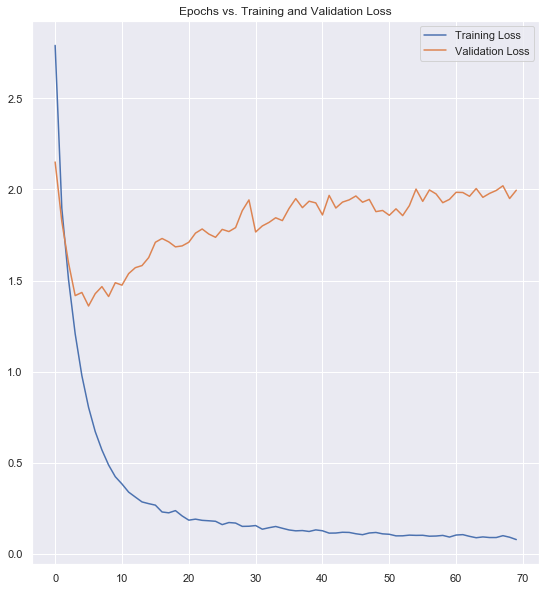

In [165]:
#Plot training loss, validation loss vs number of epochs
train_loss = model_lstmbi_tune_hist.history['loss']
val_loss = model_lstmbi_tune_hist.history['val_loss']
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.title('Epochs vs. Training and Validation Loss')

Text(0.5, 1.0, 'Epochs vs. Training and Validation Accuracy')

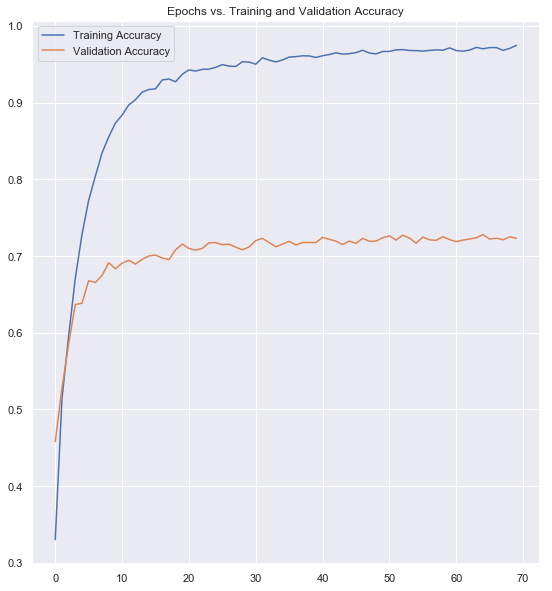

In [166]:
#Plot training loss, validation loss vs number of epochs
train_acc = model_lstmbi_tune_hist.history['acc']
val_acc = model_lstmbi_tune_hist.history['val_acc']
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Epochs vs. Training and Validation Accuracy')

In [167]:
#Let us check the classification_report for the evaluation metrics and performance of model in the prediction of
#individual classes. 
y_test_tune_tknzr_max = np.argmax(y_test_tune_tknzr, axis=1)
model_lstmbi_tune_predictions = model_lstmbi_tune.predict_classes(X_test_tune_seq_pad)
print(classification_report(y_test_tune_tknzr_max, model_lstmbi_tune_predictions))

              precision    recall  f1-score   support

           0       0.72      0.64      0.68       766
           1       0.65      0.57      0.61       155
           2       0.54      0.62      0.58       164
           3       0.58      0.53      0.56       150
           4       0.43      0.55      0.48       177
           5       0.56      0.57      0.56       178
           6       0.49      0.58      0.53       177
           7       0.45      0.64      0.53       152
           8       0.52      0.52      0.52       170
           9       0.55      0.57      0.56       157
          10       0.77      0.49      0.60       168
          11       0.41      0.41      0.41       160
          12       0.48      0.43      0.45       180
          13       0.55      0.60      0.57       153
          14       0.71      0.61      0.66       154
          15       0.48      0.62      0.54       155
          16       0.71      0.67      0.69       150
          17       0.64    

With the help of more obersvations, the model will be able to learn better. The company can keep check on groups with less number of documents, collect enough observations, and can achieve improved performance in classifying more individual classes accurately
